# Machine learning for Medicine
## Lab II - Application of Unsupervised ML methods for medical data stratification

*Badis Jaouani - M2 Stat*
___

This lab is about applying and assessing Unsupervised Machine Learning tasks, which are clustering, on simulated and real data sets. The algorithms to compare are the following: 

- `KMeans` clustering which is one of the cost reduction methods.
- `AgglomerativeClustering` which falls into the hierarchical clustering methods
- `SpectralClustering` which uses similarity graphs and the eigen decomposition of the Laplacian Matrix. 
- `DBSCAN` which falls into the density-based methods, very efficient in many. cases.
For more details on the different methods, see (Sangnier, 2020) and https://scikit-learn.org/stable/modules/clustering.html


To evaluate the different methods, a set of metrics is used:

- The elbow method (Sangnier, 2020), which requires computing the affinity, used exclusively to assess the `KMeans` algorithm.
- The silhouette coefficient, that gives hints about the obtained clustering, this metric does not compare with the ground truth, making it, along with the elbow method, very useful to our clusters discovery.

Once the number of clusters fixed using the above methods, the comparaison with the ground truth is given by the following metrics:

- `homogeneity_score`: *a clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class* (source `Scikit-Learn`).
- `completeness_score`: *A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster* (source `Scikit-Learn`).
- `v_measure_score`: the average of the two above mertics. The theses metrics are, the better.
- `adj_rand_score`: The adjusted Rand index is ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (source `Scikit-Learn`).

# Table of contents
___
1. [Analysis on simulated datasets](#Import)
    - [Datasets construction](#Import)
    - [Applying clustering methods](#Import)
        - [Evaluation on Dataset 1 - Binary Classification with normally distributed clusters](#Import)
        - [Evaluation on Dataset 2 - Multilabel Classification](#Import)
        - [Evaluation on Dataset 3 - Binary Classification with non-normally distributed clusters](#Import)
2. [Data sets from medical applications](#Import)
    - [Mice Protein Expression](#Import)
        - [Data Import & Preprocessing](#Import)
        - [Mice Stratification using Unsupervised Learning](#Import)
    - [DBreast Cancer Diagnosis](#Download_data)
        - [Data exploration & Preprocessing](#Import)
        - [Breast Cancer diagnosis using Unsupervised Learning](#Import)
    - [Mice classification and Breast Cancer Diagnosis using Supervised Machine Learning](#X) 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set_style('whitegrid')

import matplotlib.pyplot as plt 
from IPython.display import display, HTML
%config InlineBackend.figure_format = 'retina'

from sklearn import metrics, cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.datasets import make_classification, make_blobs, make_moons 

# I. Analysis on simulated datasets
___

We start the analysis using simulated data sets. In the second part of the lab will deal with real data from medical applications.

# I.1 Datasets construction

In [2]:
# Fisrt dataset
X1, y1 = make_classification(n_samples = 200, n_features = 2, 
                             n_informative = 2, n_classes = 2,
                             n_clusters_per_class = 1, n_redundant = 0, random_state = 0)
# Second dataset
X2, y2 = make_blobs(n_samples = 200, n_features = 2, 
                    centers = 3, random_state = 0)
# Third dataset
X3, y3 = make_moons(n_samples = 200, noise = 0.08, random_state = 0)

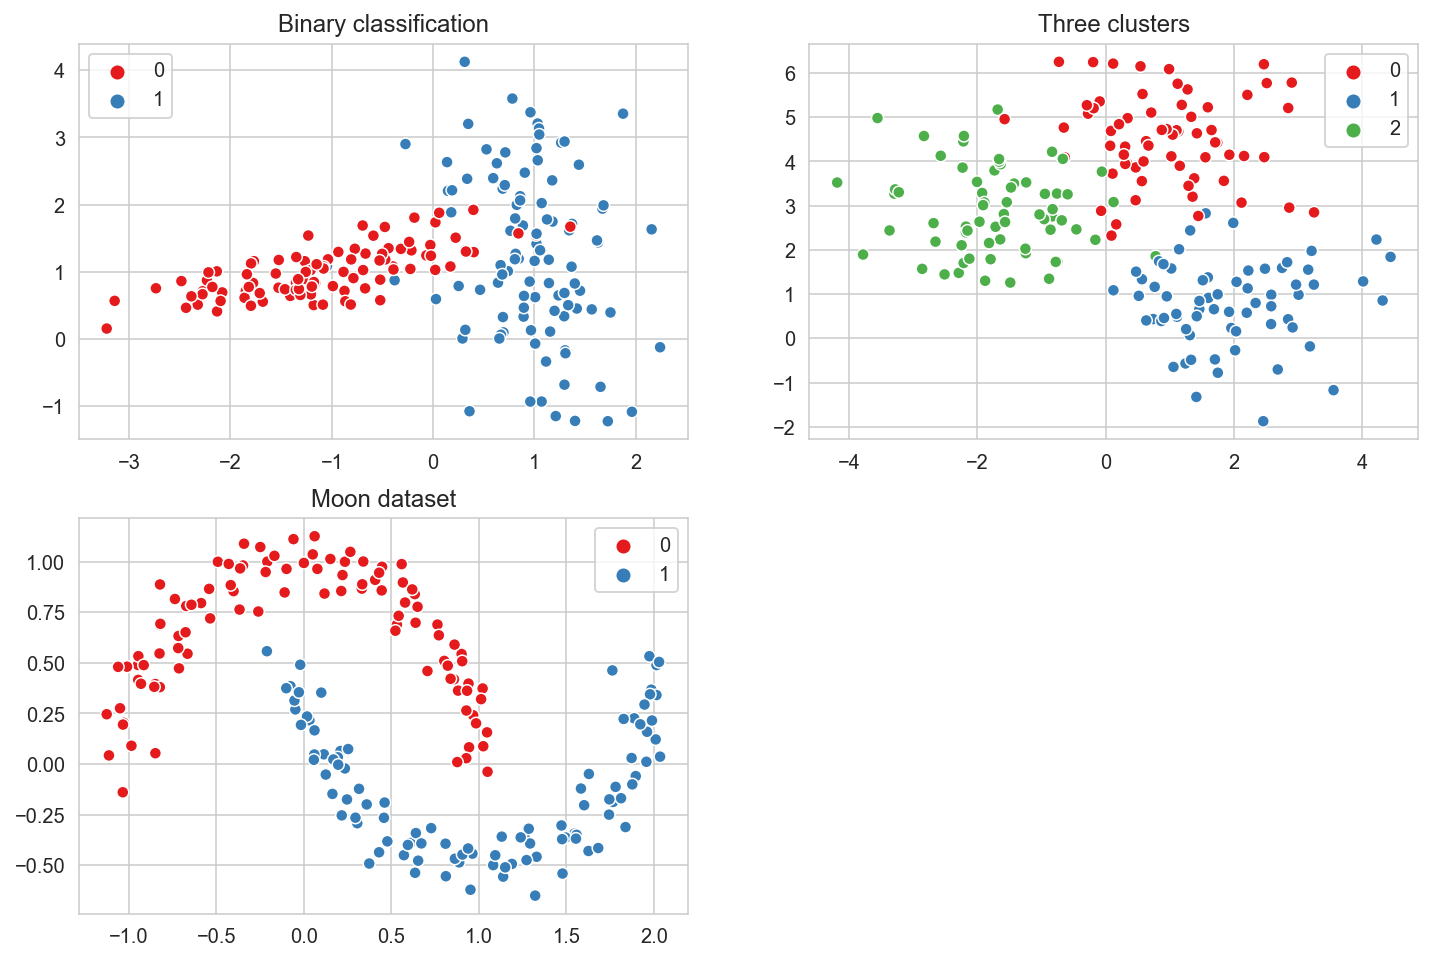

In [3]:
plt.figure(figsize = (12,8))
plt.subplot(221)
sns.scatterplot(X1[:,0], X1[:,1], hue = y1, palette = 'Set1')
plt.title('Binary classification')

plt.subplot(222)
sns.scatterplot(X2[:,0], X2[:,1], hue = y2, palette = 'Set1')
plt.title('Three clusters');

plt.subplot(223)
sns.scatterplot(X3[:,0], X3[:,1], hue = y3, palette = 'Set1')
plt.title('Moon dataset');

# I.2 Applying clustering methods

## 1) Evaluation on Dataset 1 - Binary Classification with normally distributed clusters

Once the data sets are simulated, we test different number of clusters and assess the results using the metrics defined above.

In [4]:
# Testing different number of clusters
nb_clusters = range(1,6)
figure = range(2,7)

### 1.1) K-means

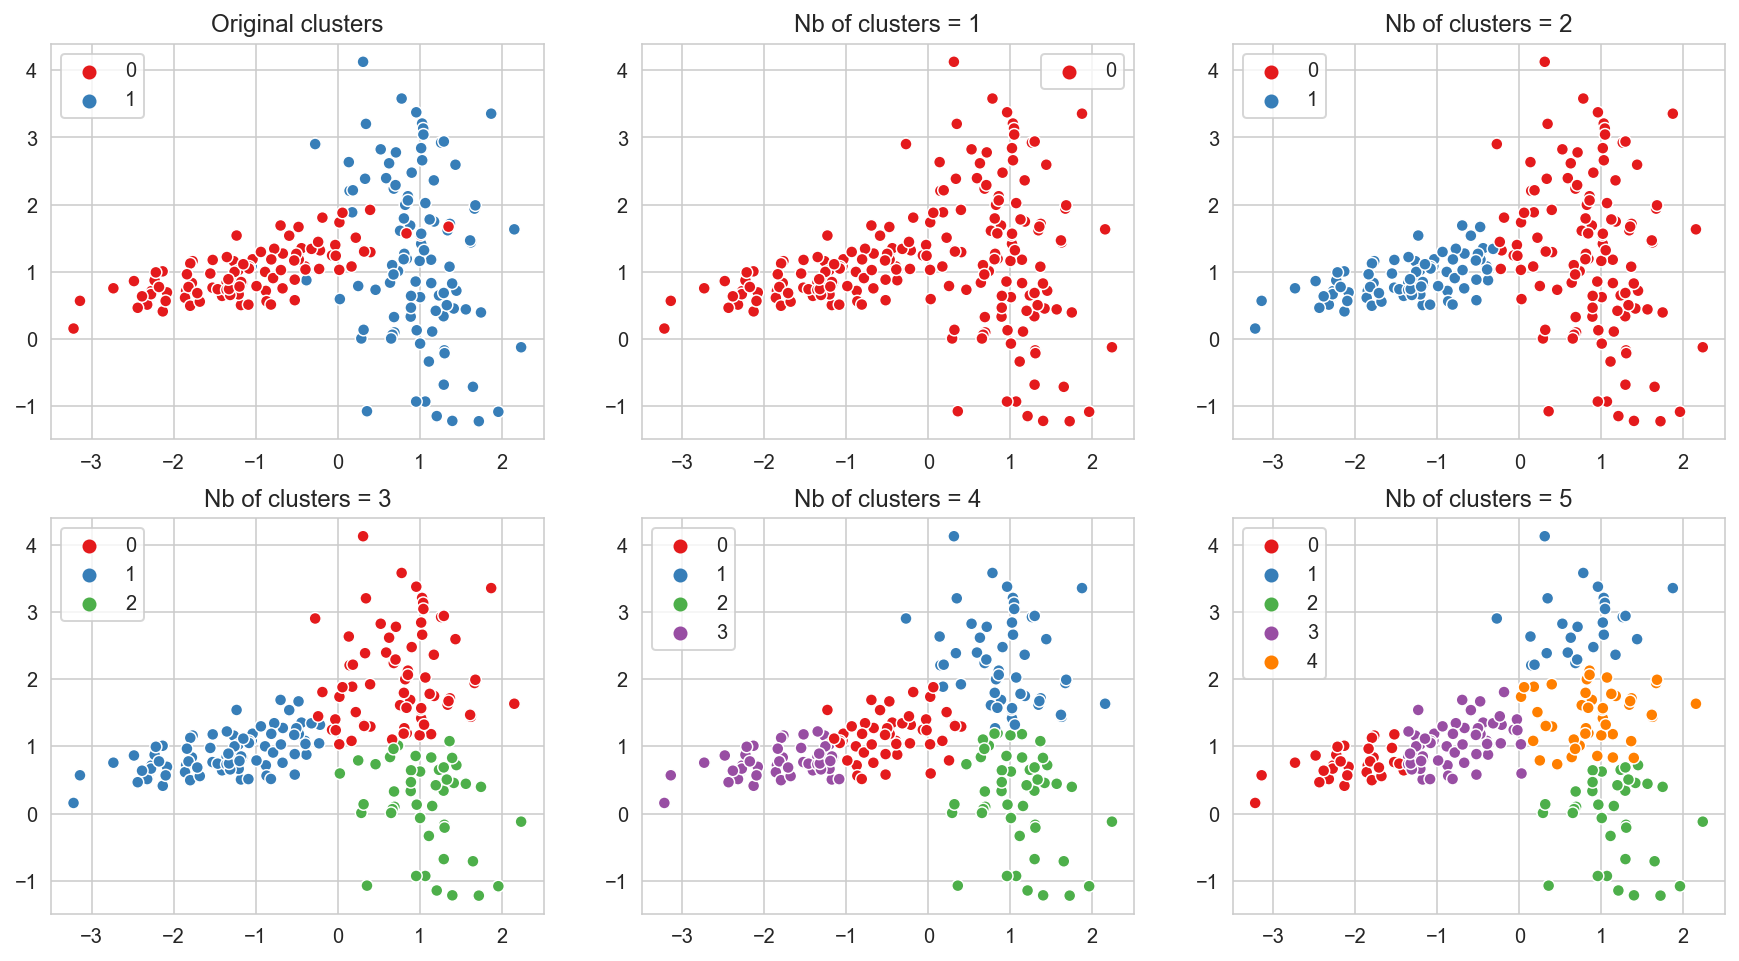

In [5]:
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.scatterplot(X1[:,0], X1[:,1], hue = y1, palette = 'Set1', sizes = 0.7)
plt.title('Original clusters')

hcv_km, ars_km = [], []
for k,fig in zip(nb_clusters,figure):
    km_bn = KMeans(n_clusters = k).fit(X1,y1)
    
    # Scores
    hcv_km.append(metrics.homogeneity_completeness_v_measure(y1, km_bn.labels_))
    ars_km.append(metrics.adjusted_rand_score(y1, km_bn.labels_))
    
    # Plots
    plt.subplot(2,3,fig)
    sns.scatterplot(X1[:,0], X1[:,1], hue = km_bn.labels_, palette = 'Set1', sizes = 0.7)
    plt.title('Nb of clusters = {}'.format(k))

### 1.2) Hierarchical clustering

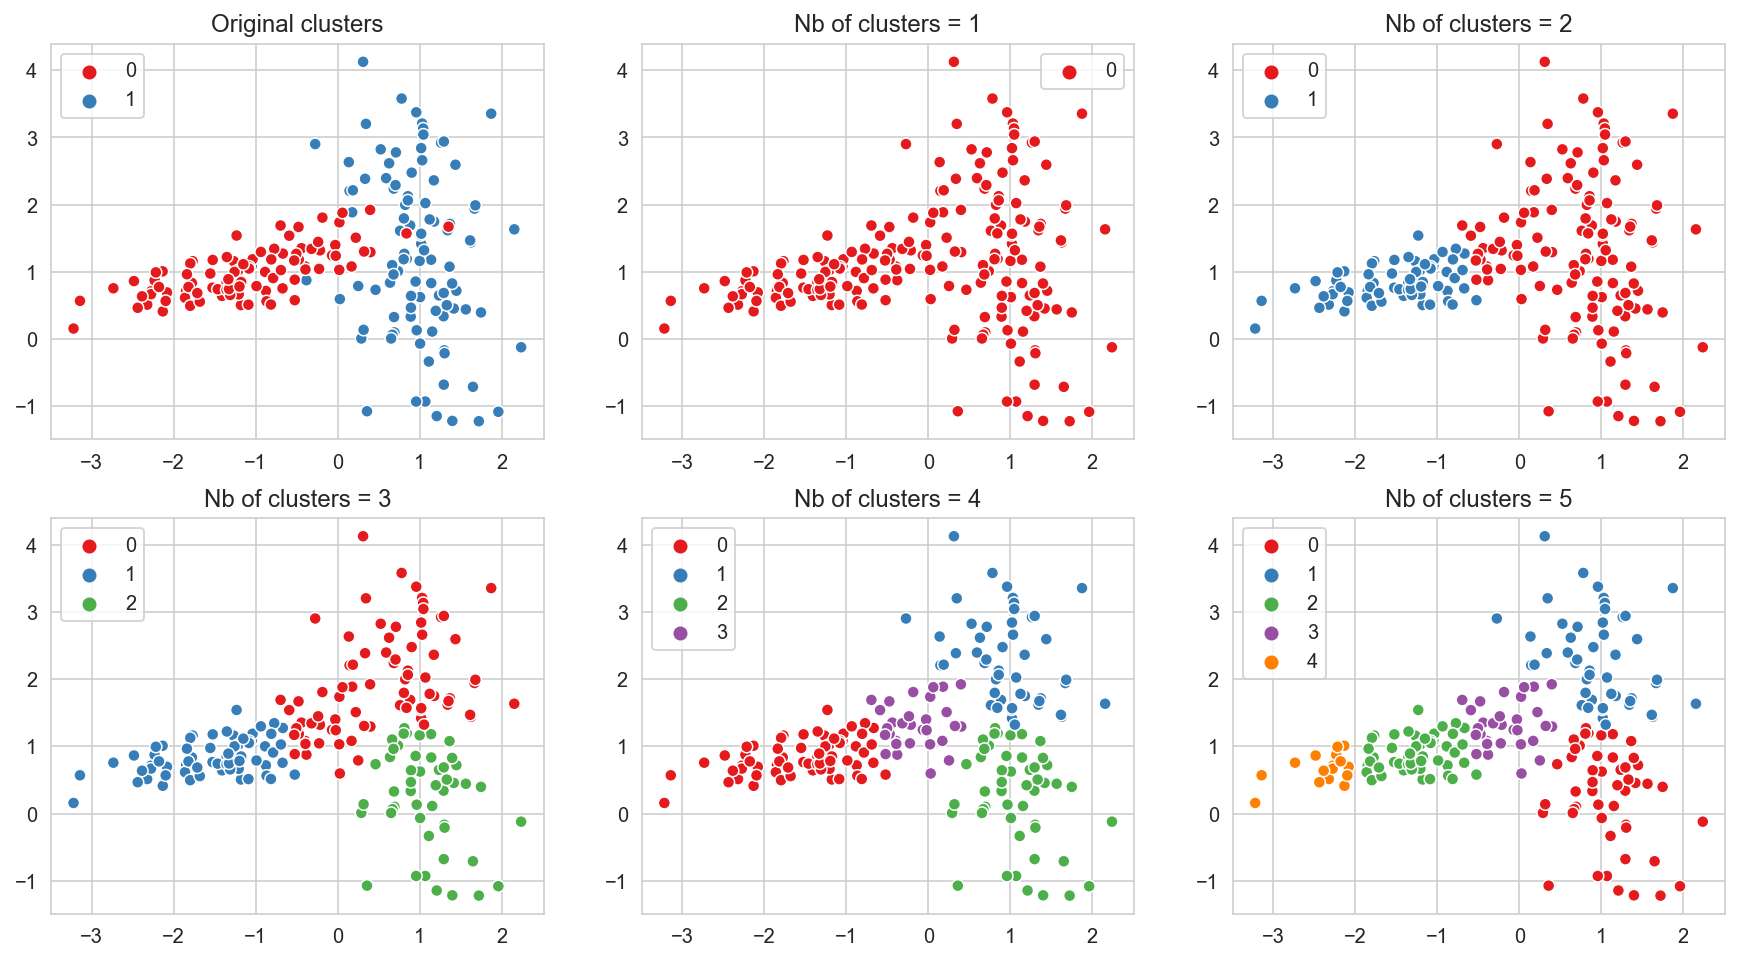

In [6]:
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.scatterplot(X1[:,0], X1[:,1], hue = y1, palette = 'Set1')
plt.title('Original clusters')

hcv_agg, ars_agg = [], []
for k,fig in zip(nb_clusters,figure):
    agg_bn = AgglomerativeClustering(n_clusters = k).fit(X1,y1)
    
    # Scores
    hcv_agg.append(metrics.homogeneity_completeness_v_measure(y1, agg_bn.labels_))
    ars_agg.append(metrics.adjusted_rand_score(y1, agg_bn.labels_))
    
    # Plots
    plt.subplot(2,3,fig)
    sns.scatterplot(X1[:,0], X1[:,1], hue = agg_bn.labels_, palette = 'Set1')
    plt.title('Nb of clusters = {}'.format(k))

### 1.3) Spectral clustering

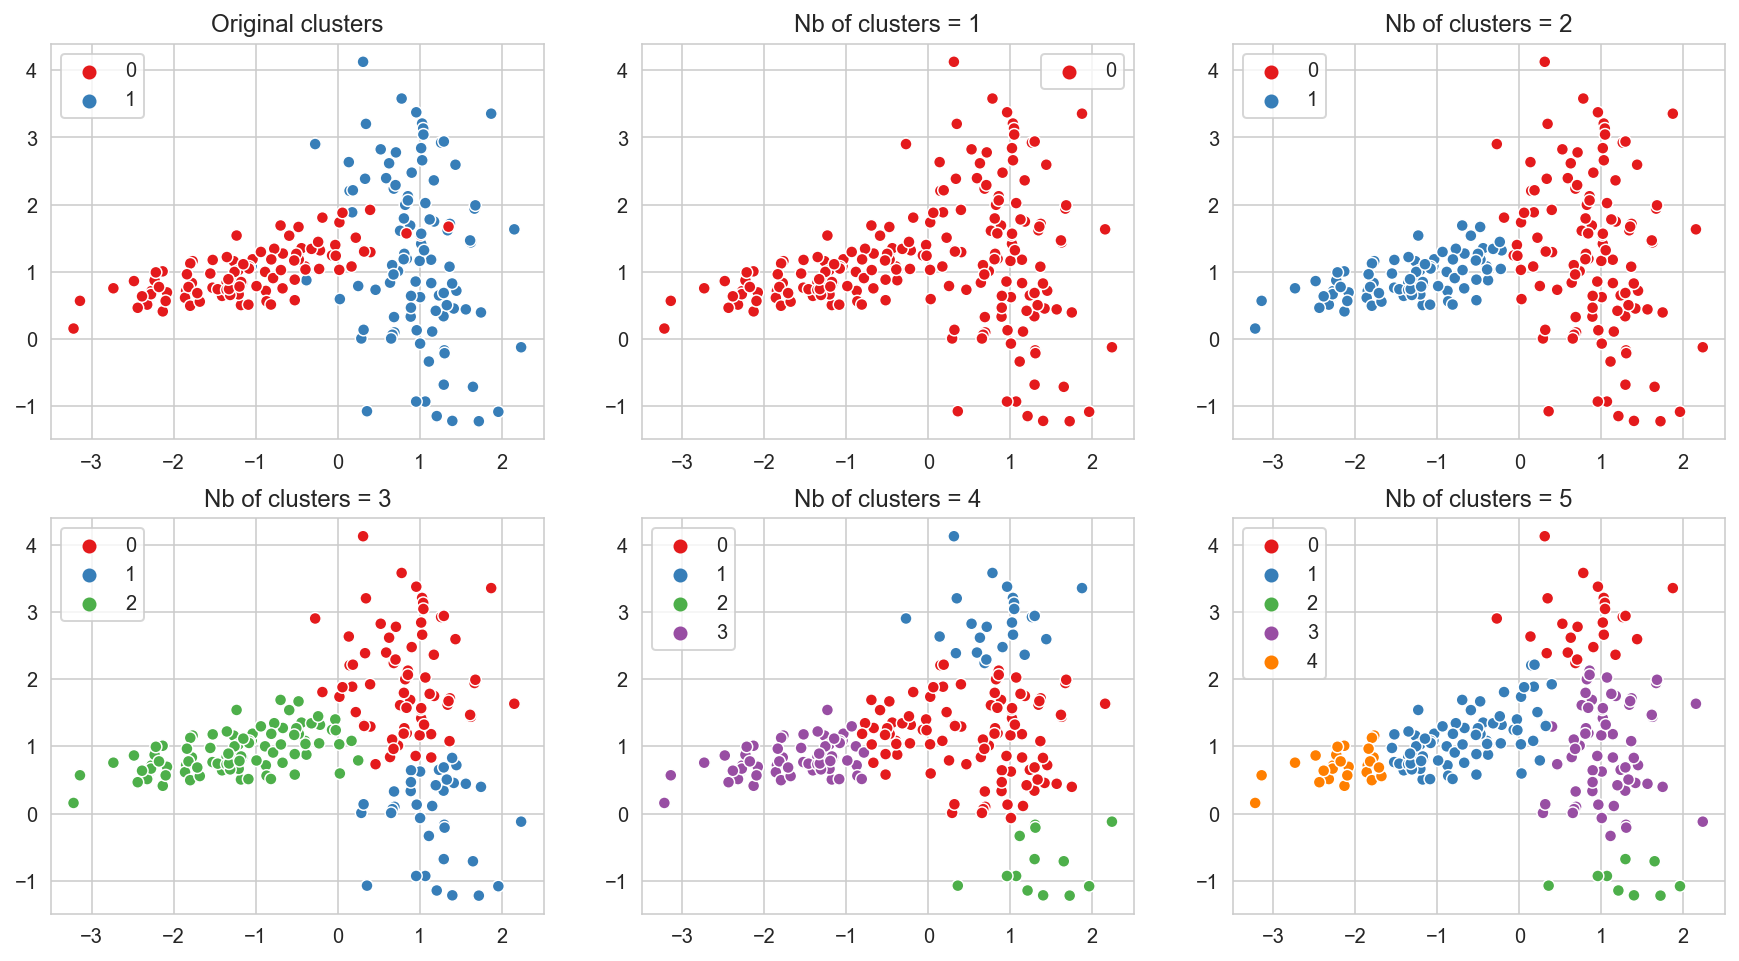

In [7]:
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.scatterplot(X1[:,0], X1[:,1], hue = y1, palette = 'Set1')
plt.title('Original clusters')

hcv_spec, ars_spec = [], []
for k,fig in zip(nb_clusters,figure):
    spec_bn = SpectralClustering(n_clusters = k).fit(X1,y1)
        
    # Scores
    hcv_spec.append(metrics.homogeneity_completeness_v_measure(y1, spec_bn.labels_))
    ars_spec.append(metrics.adjusted_rand_score(y1, spec_bn.labels_))
    
    # Plots
    plt.subplot(2,3,fig)
    sns.scatterplot(X1[:,0], X1[:,1], hue = spec_bn.labels_, palette = 'Set1')
    plt.title('Nb of clusters = {}'.format(k))

### 1.4) Comparaison on Dataset 1 (Binary Classification)
In this dataset, there is a slight overlap between the two original clusters. Let us evaluate the different clustering methods.

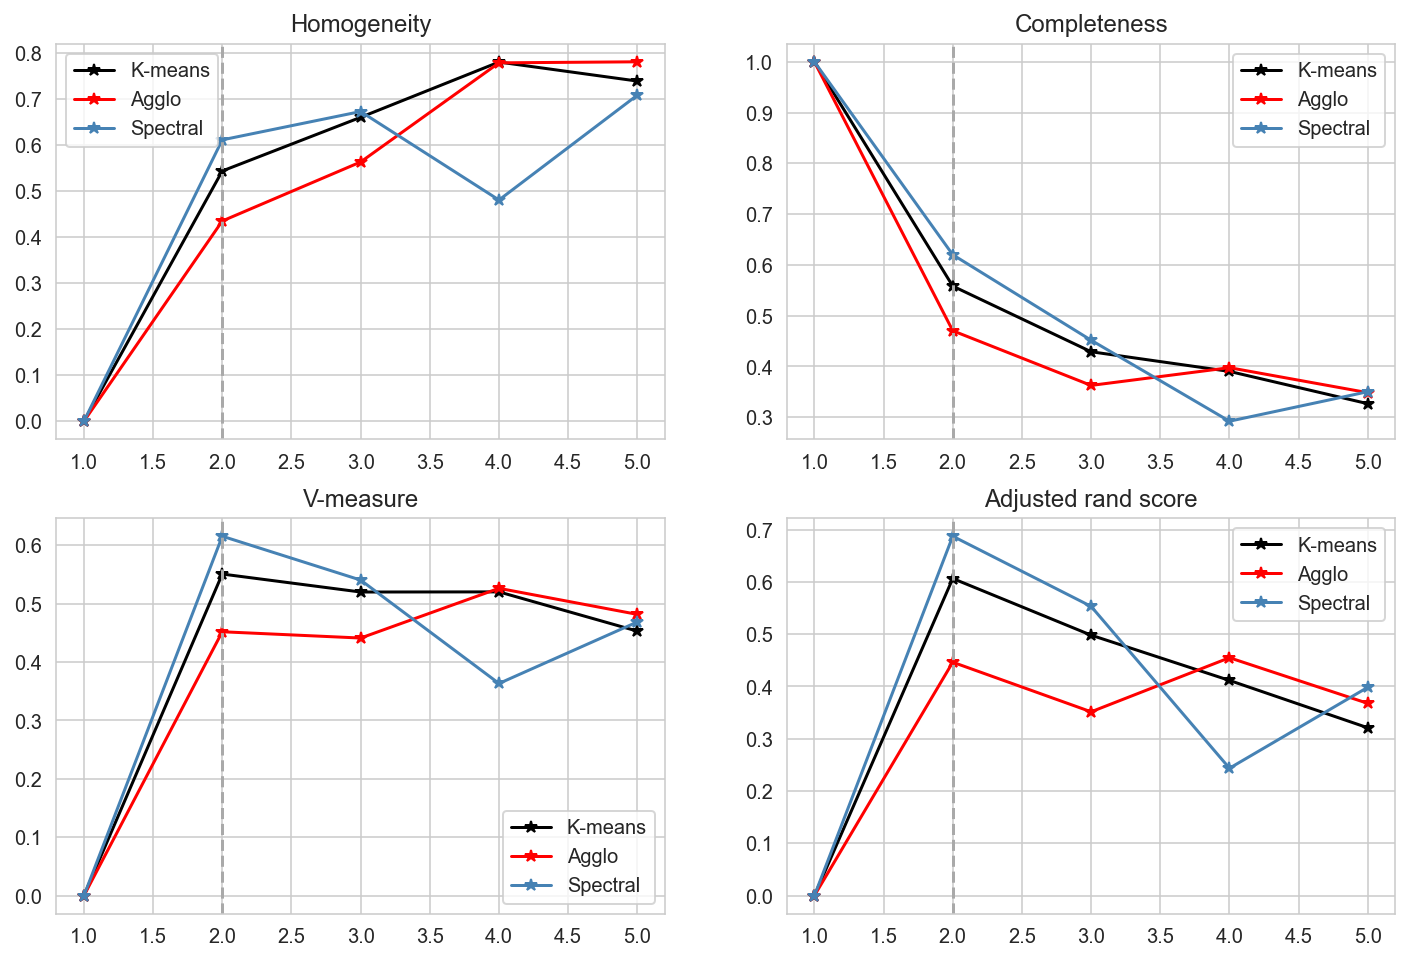

In [8]:
# Clustering scores
score = ['Homogeneity', 'Completeness', 'V-measure']
plt.figure(figsize = (12,8))
for i,fig in zip(score,range(3)) :
    plt.subplot(2,2,fig+1) 
    plt.plot(nb_clusters, np.array(hcv_km)[:,fig], '-*', label = 'K-means', color = 'black')
    plt.plot(nb_clusters, np.array(hcv_agg)[:,fig], '-*', label = 'Agglo', color = 'red')
    plt.plot(nb_clusters, np.array(hcv_spec)[:,fig], '-*', label = 'Spectral', color = 'steelblue')
    plt.axvline(x = 2, ls = '--', color = 'darkgray')
    plt.legend(loc = 'best')
    plt.title(i);

plt.subplot(2,2,4)
plt.plot(nb_clusters, ars_km, '-*', label = 'K-means', color = 'black')
plt.plot(nb_clusters, ars_agg, '-*', label = 'Agglo', color = 'red')
plt.plot(nb_clusters, ars_spec, '-*', label = 'Spectral', color = 'steelblue')
plt.axvline(x = 2, ls = '--', color = 'darkgray')
plt.legend(loc = 'best')
plt.title('Adjusted rand score');

The curves show that for all algorithms, the optimal number of clusters is `nb_clusters = 2`. Spectral clustering seems to have the highest scores, followed by k-means. But none of the algorithms is able to correctly detect the group of overlapping points, leading in `v_measure_score` and `adj_rand_score` that are strictly smaller than 1. In overall, all the algorithms perform well.

Let us compare the same algorithms on a multi-label classification problem.

## 2) Evaluation on Dataset 2 - Multilabel Classification
This data set contains fewer overlapping points, but the difficulty is still to determine the optimal clusters ie the ones that are the most similar to the original labels.
### 2.1) K-means

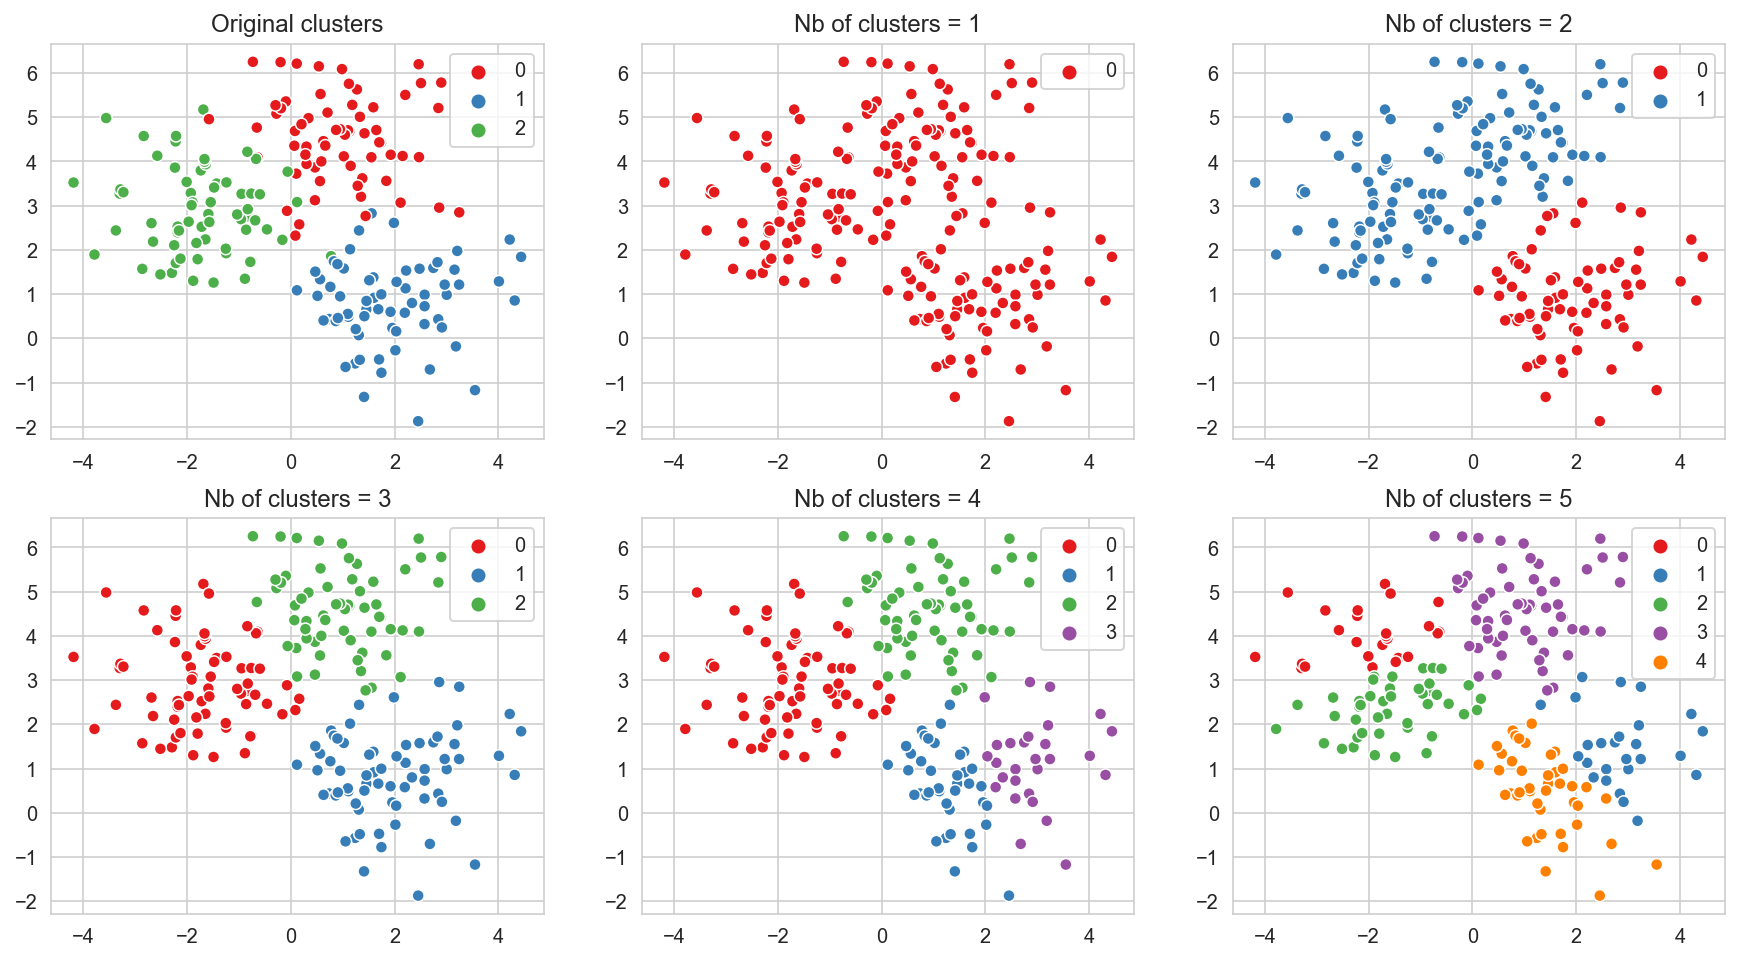

In [9]:
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.scatterplot(X2[:,0], X2[:,1], hue = y2, palette = 'Set1', sizes = 0.7)
plt.title('Original clusters')

hcv_km, ars_km = [], []
for k,fig in zip(nb_clusters,figure):
    km_mult = KMeans(n_clusters = k).fit(X2,y2)
    
    # Scores
    hcv_km.append(metrics.homogeneity_completeness_v_measure(y2, km_mult.labels_))
    ars_km.append(metrics.adjusted_rand_score(y2, km_mult.labels_))
    
    # Plots
    plt.subplot(2,3,fig)
    sns.scatterplot(X2[:,0], X2[:,1], hue = km_mult.labels_, palette = 'Set1', sizes = 0.7)
    plt.title('Nb of clusters = {}'.format(k))

### 2.2) Hierarchical Clustering

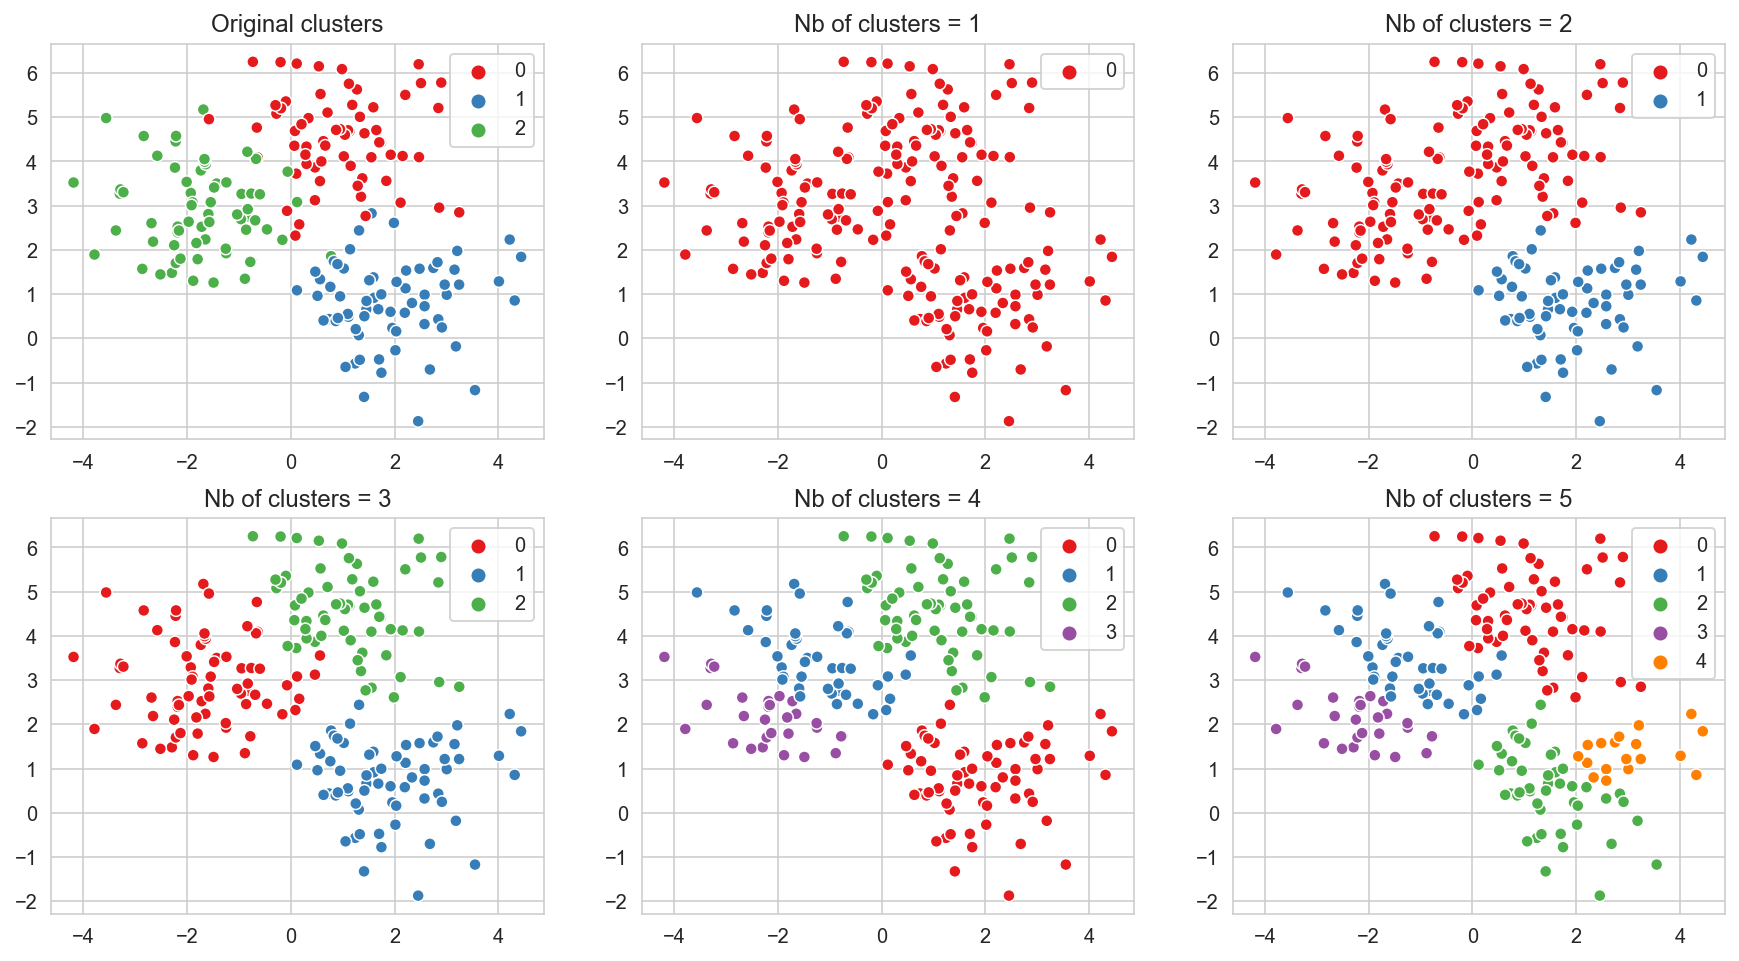

In [10]:
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.scatterplot(X2[:,0], X2[:,1], hue = y2, palette = 'Set1', sizes = 0.7)
plt.title('Original clusters')

hcv_agg, ars_agg = [], []
for k,fig in zip(nb_clusters,figure):
    agg_mult = AgglomerativeClustering(n_clusters = k).fit(X2,y2)
    
    # Scores
    hcv_agg.append(metrics.homogeneity_completeness_v_measure(y2, agg_mult.labels_))
    ars_agg.append(metrics.adjusted_rand_score(y2, agg_mult.labels_))
    
    # Plots
    plt.subplot(2,3,fig)
    sns.scatterplot(X2[:,0], X2[:,1], hue = agg_mult.labels_, palette = 'Set1')
    plt.title('Nb of clusters = {}'.format(k))

### 2.3) Spectral Clustering

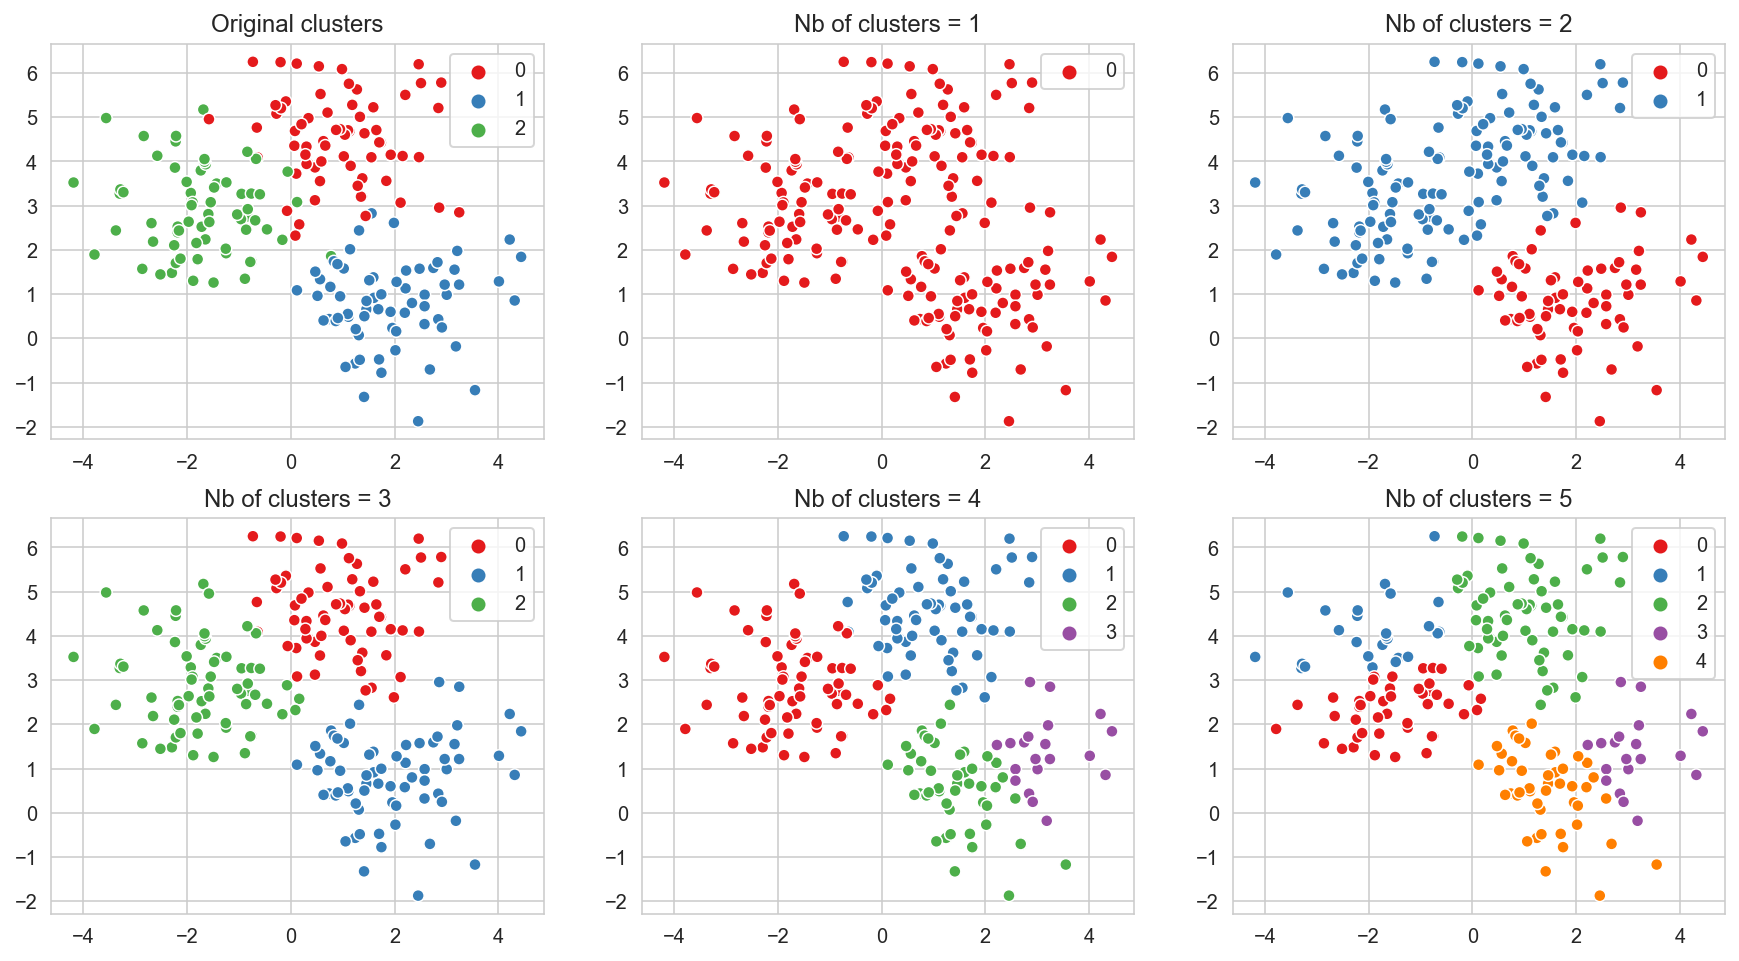

In [11]:
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.scatterplot(X2[:,0], X2[:,1], hue = y2, palette = 'Set1', sizes = 0.7)
plt.title('Original clusters')

hcv_spec, ars_spec = [], []
for k,fig in zip(nb_clusters,figure):
    spec_mult = SpectralClustering(n_clusters = k).fit(X2,y2)
    
    # Scores
    hcv_spec.append(metrics.homogeneity_completeness_v_measure(y2, spec_mult.labels_))
    ars_spec.append(metrics.adjusted_rand_score(y2, spec_mult.labels_))
    
    # Plots
    plt.subplot(2,3,fig)
    sns.scatterplot(X2[:,0], X2[:,1], hue = spec_mult.labels_, palette = 'Set1')
    plt.title('Nb of clusters = {}'.format(k))

### 2.4) Comparaison on Dataset 2 (Multilabel Classification)

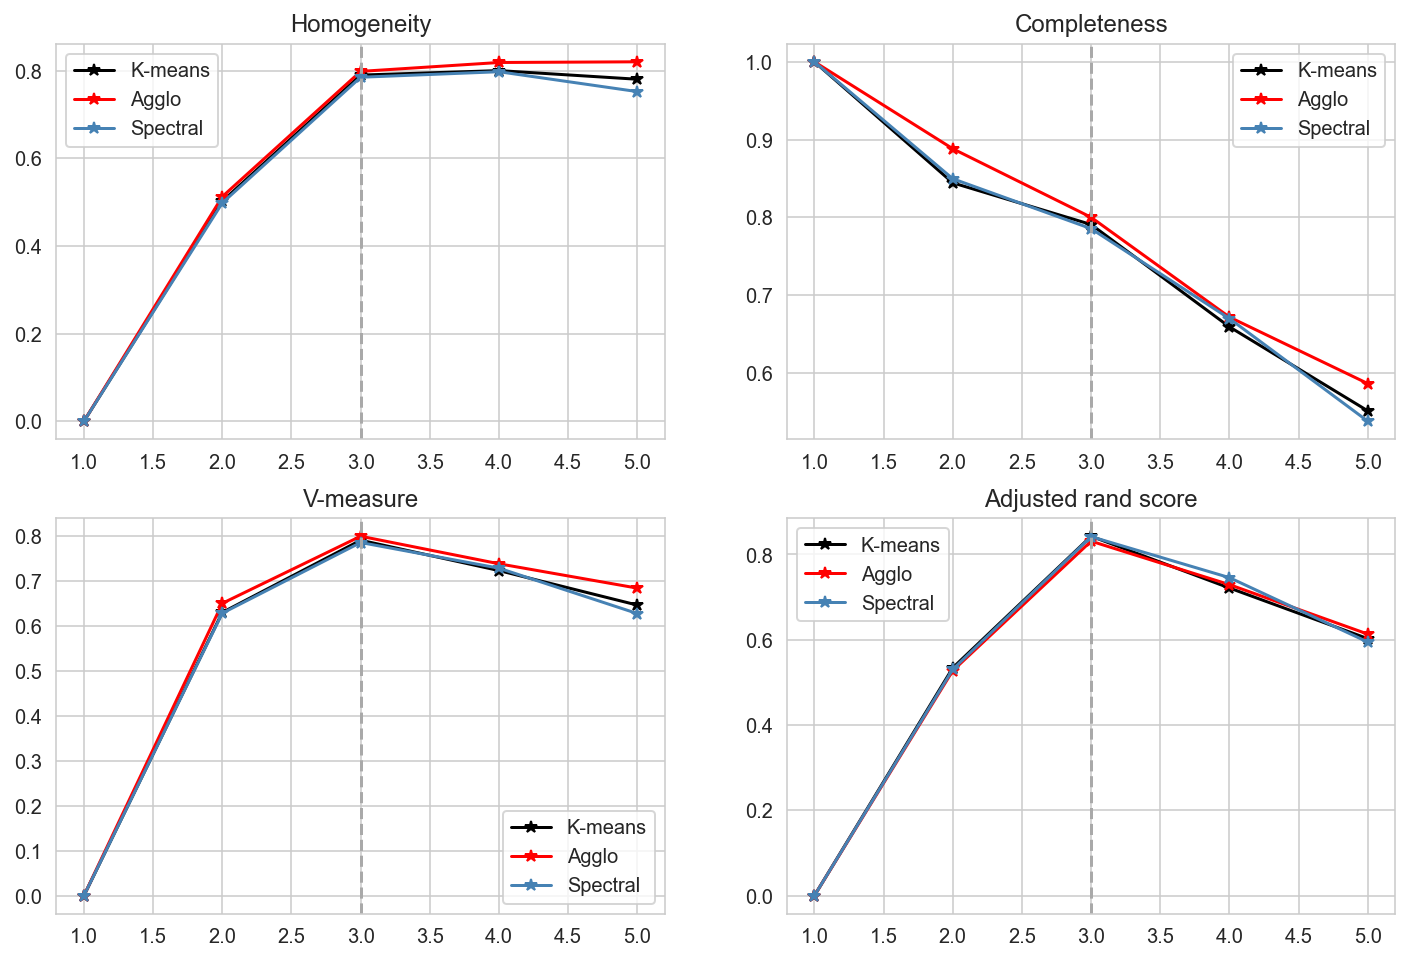

In [12]:
# Clustering scores

plt.figure(figsize = (12,8))
for i,fig in zip(score,range(3)) :
    plt.subplot(2,2,fig+1)
    plt.plot(nb_clusters, np.array(hcv_km)[:,fig], '-*', label = 'K-means', color = 'black')
    plt.plot(nb_clusters, np.array(hcv_agg)[:,fig], '-*', label = 'Agglo', color = 'red')
    plt.plot(nb_clusters, np.array(hcv_spec)[:,fig], '-*', label = 'Spectral', color = 'steelblue')
    plt.axvline(x = 3, ls = '--', color = 'darkgray')
    plt.legend(loc = 'best')
    plt.title(i);

plt.subplot(2,2,4)
plt.plot(nb_clusters, ars_km, '-*', label = 'K-means', color = 'black')
plt.plot(nb_clusters, ars_agg, '-*', label = 'Agglo', color = 'red')
plt.plot(nb_clusters, ars_spec, '-*', label = 'Spectral', color = 'steelblue')
plt.axvline(x = 3, ls = '--', color = 'darkgray')
plt.legend(loc = 'best')
plt.title('Adjusted rand score');

Again, all the algorithms discover the best number of clusters which is 3, they also perform very well, and in a very similar way, which explains the closeness between the three curves, with a slight advantage to `AgglomerativeClustering`this time. 

However, it is still hard for all the algorithms, to figure out the overlapping points from different labels. It is quite logical. For example, k-means and the spectral approach compute distances, the smaller the distance, the more similar the points are. 

What we have done so far is simulating data sets of which the clusters could be approximated by a Gaussian distribution. In what follows, a more complicated data set is explored, since it has clusters that are far from being normally distributed.



## 3) Evaluation on Dataset 3 - Binary Classification with *non-normally* distributed clusters
### 3.1) K-means

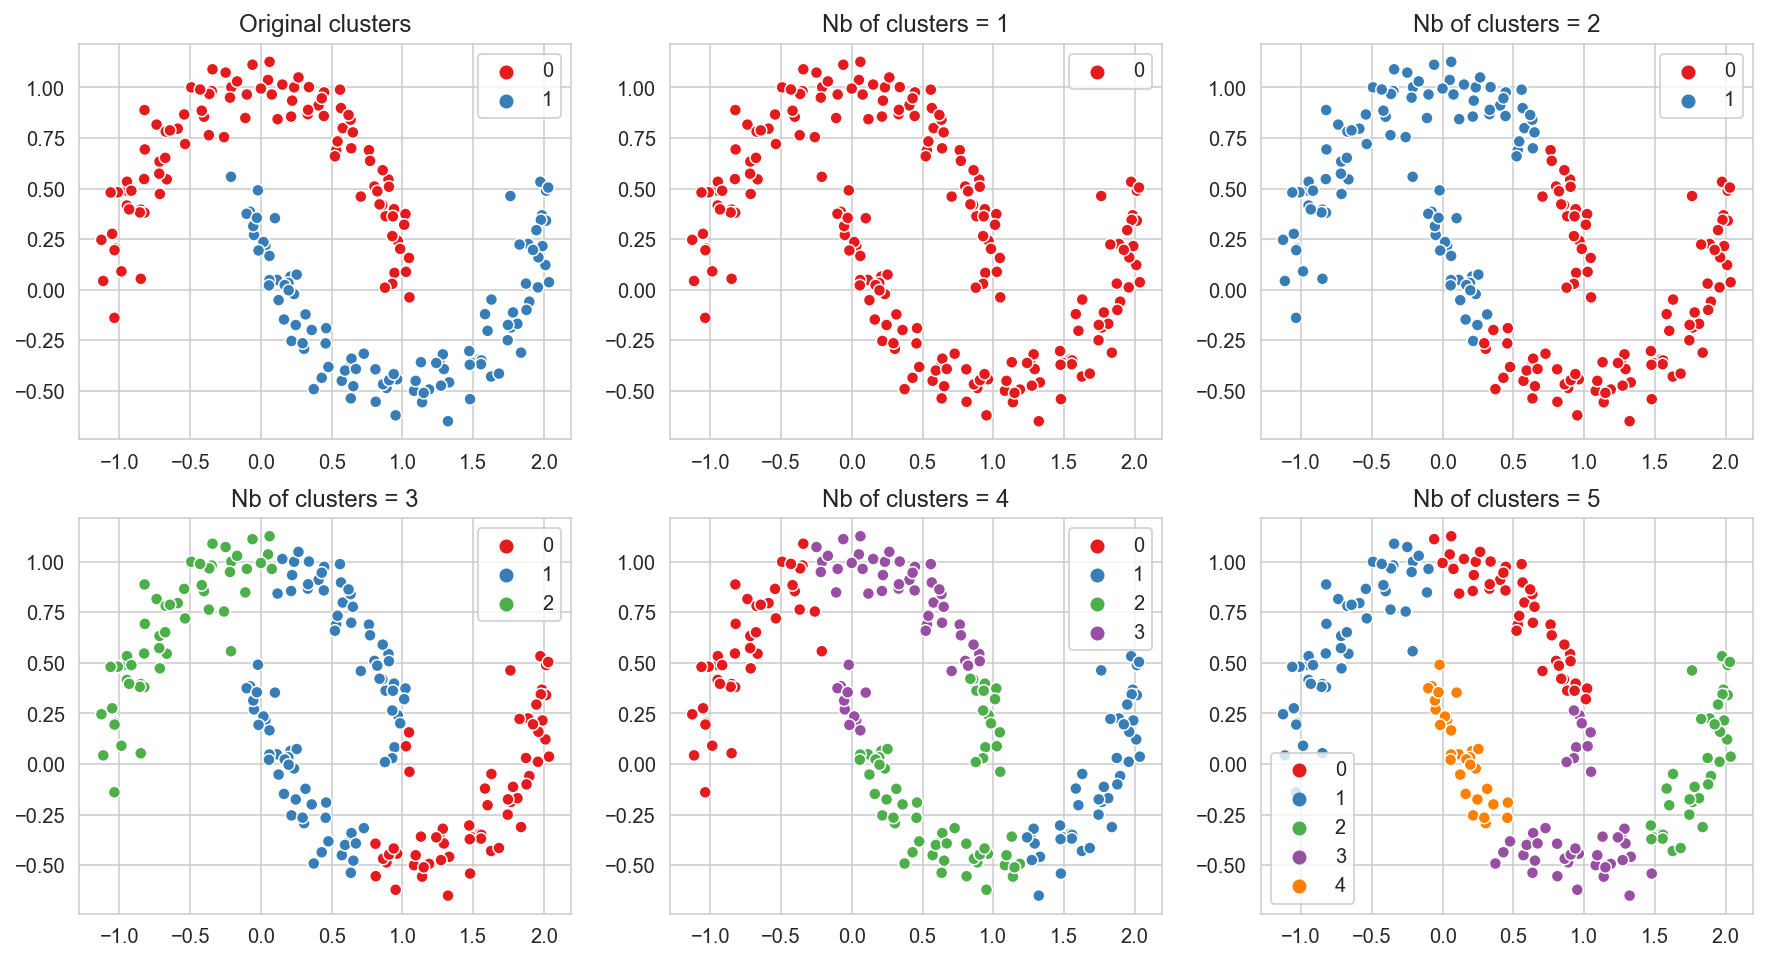

In [13]:
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.scatterplot(X3[:,0], X3[:,1], hue = y3, palette = 'Set1', sizes = 0.7)
plt.title('Original clusters')

hcv_km, ars_km = [], []
for k,fig in zip(nb_clusters,figure):
    km_moon = KMeans(n_clusters = k).fit(X3,y3)
    
    # Scores
    hcv_km.append(metrics.homogeneity_completeness_v_measure(y3, km_moon.labels_))
    ars_km.append(metrics.adjusted_rand_score(y3, km_moon.labels_))
    
    # Plots
    plt.subplot(2,3,fig)
    sns.scatterplot(X3[:,0], X3[:,1], hue = km_moon.labels_, palette = 'Set1', sizes = 0.7)
    plt.title('Nb of clusters = {}'.format(k))

### 3.2) Hierarchical Clustering

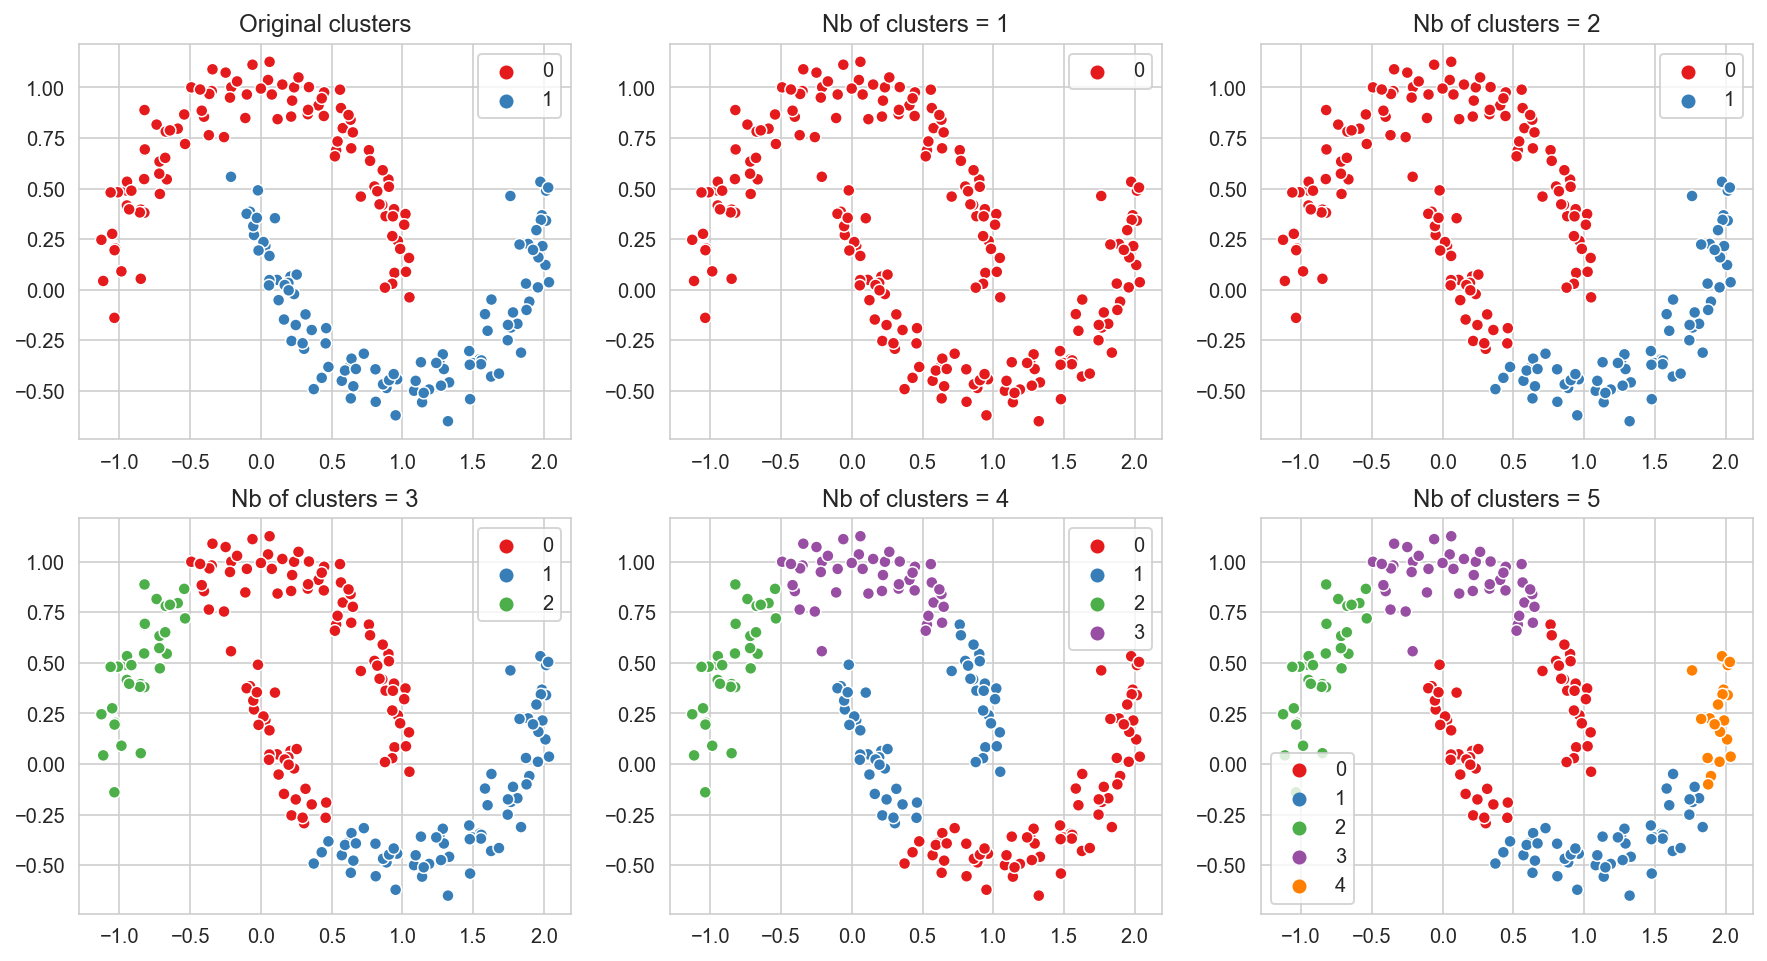

In [14]:
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.scatterplot(X3[:,0], X3[:,1], hue = y3, palette = 'Set1', sizes = 0.7)
plt.title('Original clusters')

hcv_agg, ars_agg = [], []
for k,fig in zip(nb_clusters,figure):
    agg_moon = AgglomerativeClustering(n_clusters = k).fit(X3,y3)
    
    # Scores
    hcv_agg.append(metrics.homogeneity_completeness_v_measure(y3, agg_moon.labels_))
    ars_agg.append(metrics.adjusted_rand_score(y3, agg_moon.labels_))
    
    # Plots
    plt.subplot(2,3,fig)
    sns.scatterplot(X3[:,0], X3[:,1], hue = agg_moon.labels_, palette = 'Set1', sizes = 0.7)
    plt.title('Nb of clusters = {}'.format(k))

Looking at the figures corresponding to `nb_clusters = 2`, we notice that both approaches fail in attributing the extreme samples to their correct cluster. Will `SpectralClustering`be able to do so? 
### 3.3) Spectral Clustering

Spectral Clustering is much more *'customizable'* than the two other methods, since it uses a kernelized affinity matrix. Below, we vary the *rbf* kernel's parameter $\gamma$ and see if we can get better clustering results. 

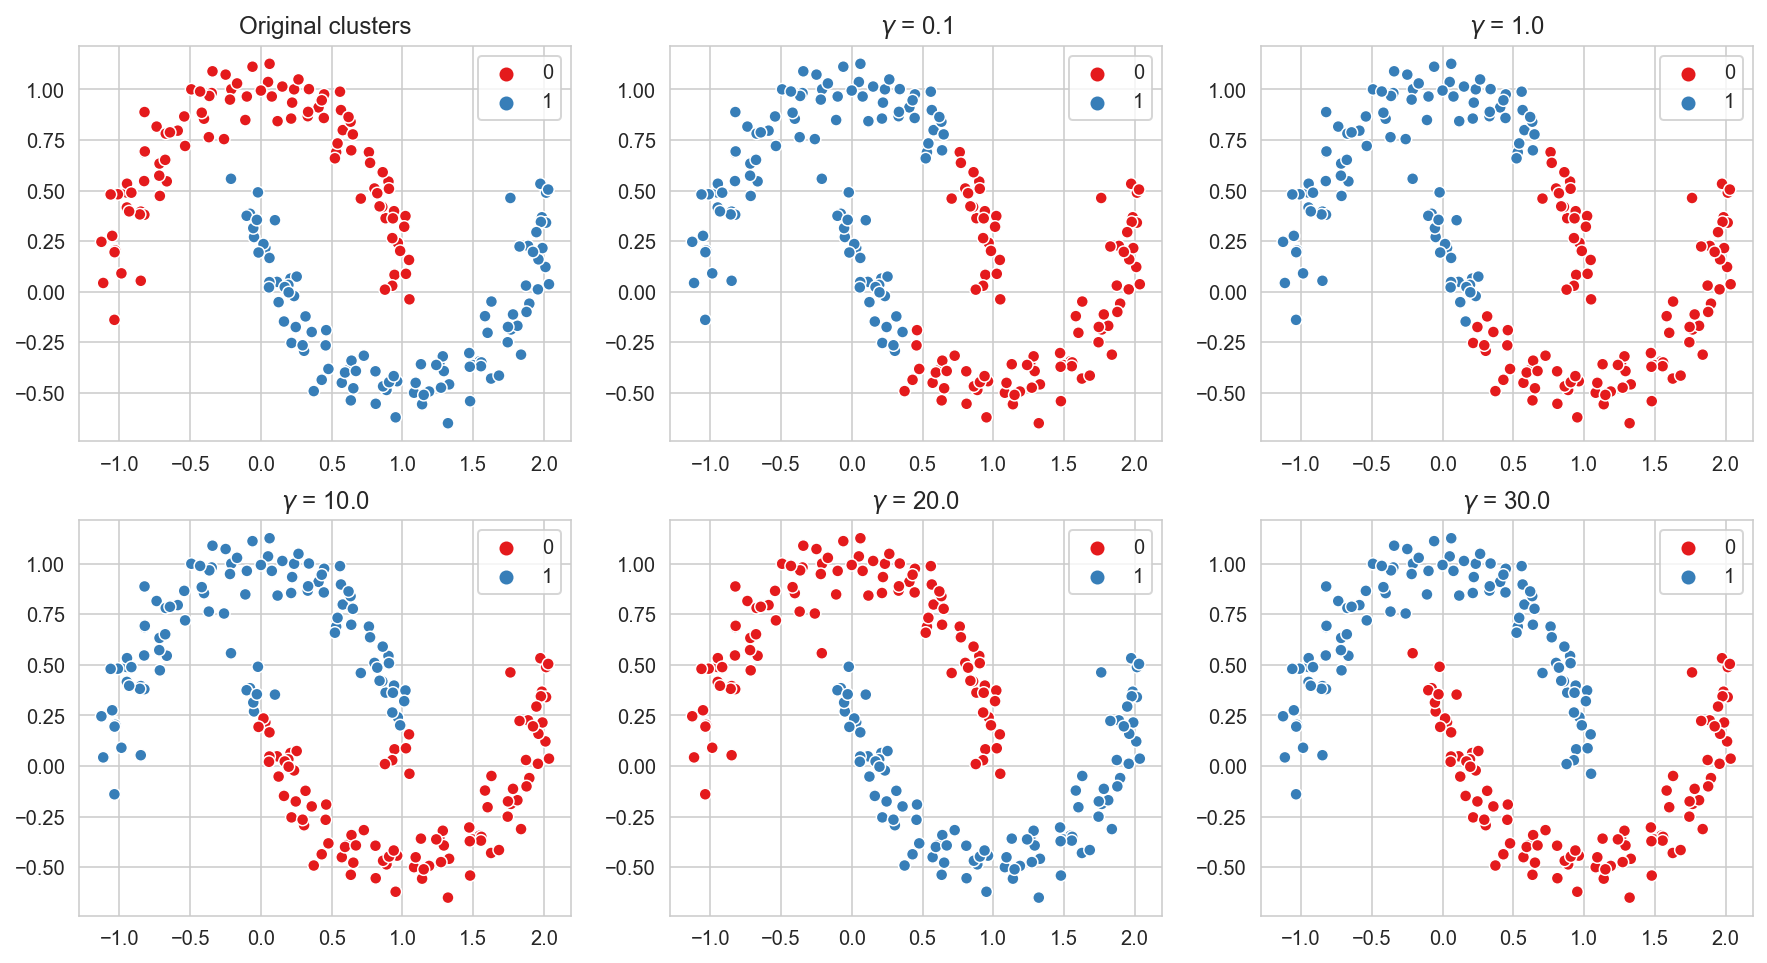

In [15]:
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.scatterplot(X3[:,0], X3[:,1], hue = y3, palette = 'Set1', sizes = 0.7)
plt.title('Original clusters')

gamma = [1e-1, 1e0, 1e1, 2e1, 3e1]
for g,fig in zip(gamma, figure): 
    spec_moon = SpectralClustering(n_clusters = 2, gamma = g).fit(X3,y3)
    
    # Plots
    plt.subplot(2,3,fig)
    sns.scatterplot(X3[:,0], X3[:,1], hue = spec_moon.labels_, palette = 'Set1')
    plt.title(r'$\gamma$ = {}'.format(g))

In [16]:
gamma_bst = 3e1
hcv_spec, ars_spec = [], []
for k,fig in zip(nb_clusters,figure):
    spec_moon = SpectralClustering(n_clusters = k, gamma = gamma_bst).fit(X3,y3)
    
    # Scores
    hcv_spec.append(metrics.homogeneity_completeness_v_measure(y3, spec_moon.labels_))
    ars_spec.append(metrics.adjusted_rand_score(y3, spec_moon.labels_))

We clearly see that for $\gamma = 30$, the algorithm finds clusters that identically match the original labels. This was not possible by the previous methods since they give no acces to kernels. The non-linear affinity matrix, computed by the Spectral Clustering algorithm, allows fitting much more complex decision boundaries. 

Let us now compare the previous approaches in terms of metrics.

### 3.4) Comparaison on Dataset 3 (Binary Classification with non-normally distributed clusters)

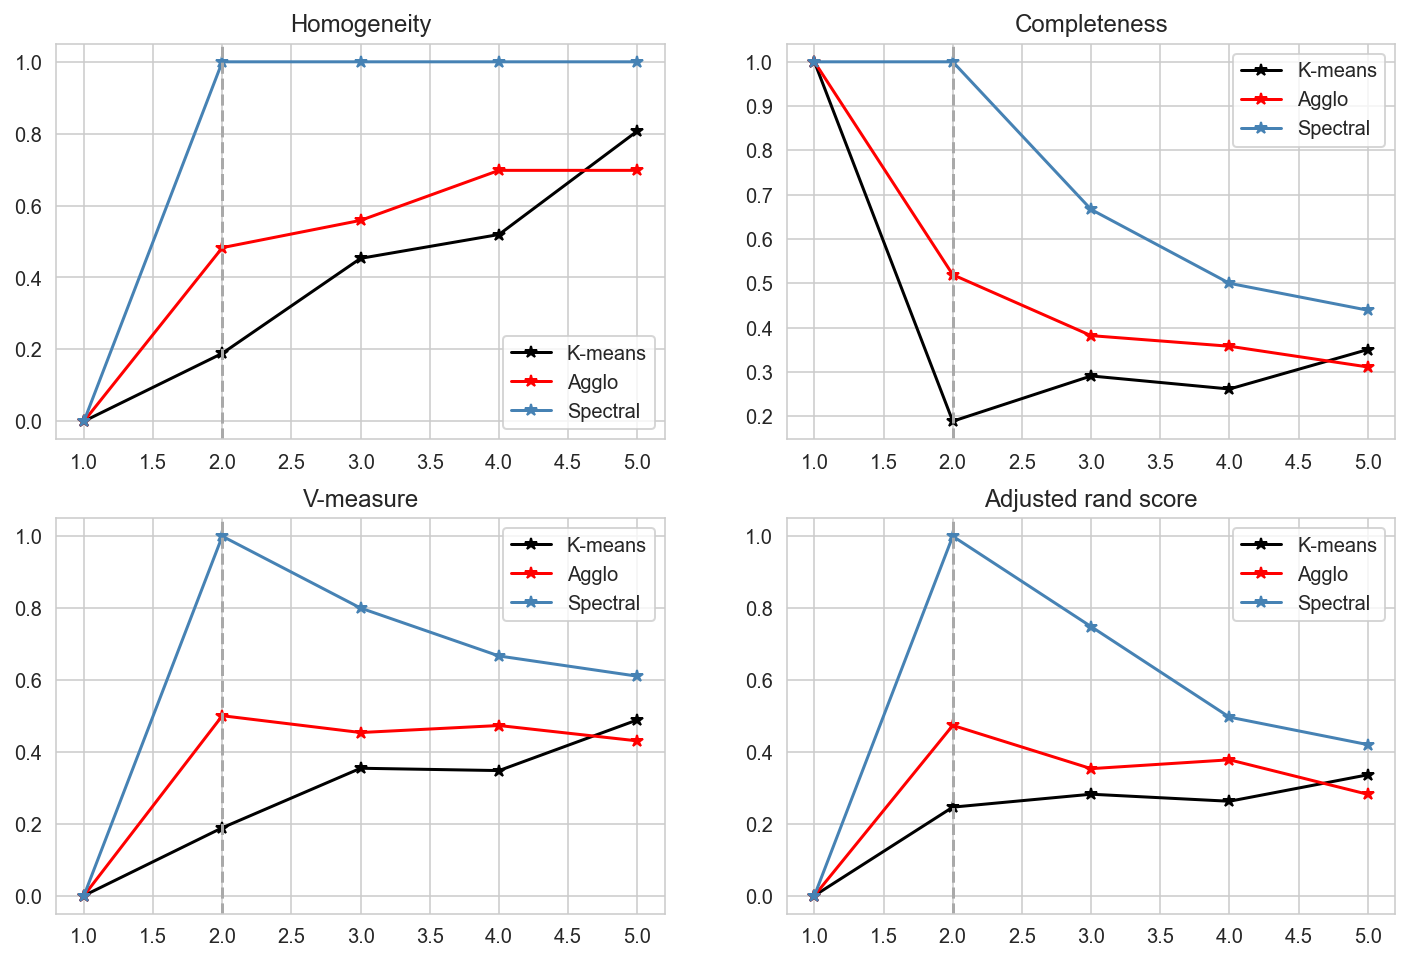

In [17]:
# Clustering scores

plt.figure(figsize = (12,8))
for i,fig in zip(score,range(3)) :
    plt.subplot(2,2,fig+1)
    plt.plot(nb_clusters, np.array(hcv_km)[:,fig], '-*', label = 'K-means', color = 'black')
    plt.plot(nb_clusters, np.array(hcv_agg)[:,fig], '-*', label = 'Agglo', color = 'red')
    plt.plot(nb_clusters, np.array(hcv_spec)[:,fig], '-*', label = 'Spectral', color = 'steelblue')
    plt.axvline(x = 2, ls = '--', color = 'darkgray')
    plt.legend(loc = 'best')
    plt.title(i);

plt.subplot(2,2,4)
plt.plot(nb_clusters, ars_km, '-*', label = 'K-means', color = 'black')
plt.plot(nb_clusters, ars_agg, '-*', label = 'Agglo', color = 'red')
plt.plot(nb_clusters, ars_spec, '-*', label = 'Spectral', color = 'steelblue')
plt.axvline(x = 2, ls = '--', color = 'darkgray')
plt.legend(loc = 'best')
plt.title('Adjusted rand score');

As shown in the figures above, in the case of *difficult* datasets, where the normal assumption is not respected, spectral clustering with well-tuned parameters offers way better results than Cost_minimization and Agglomerative approaches. While the latter struggle to find the best partition, Spectral Clustering achieves the best possible score, which corresponds to the exact partition provided by the data.

In the next part of the lab, we perform clustering on medical datasets, the first one originated from measurements on mice, and the second is about breast cancer. These datasets are downloadable from the Machine Learning Repository https://archive.ics.uci.edu/ml/datasets.php. 


# II. Data sets from medical applications
___

## 1) Mice Protein Expression 

This data set describes Mice Protein Expression, *it consists of measurements of protein modifications that produced detectable signals in the nuclear fraction of cortex.* The aim is to correctly affect the mice to the experimental group or class. There are 8 classes in total : 
- c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) 
- c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) 
- c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) 
- c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) 
- t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) 
- t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) 
- t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) 
- t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice) 

For more details, see the data set description page https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression. 

Let us start by importing the data, and some exploration. 

### 1.1) Data import & Preprocessing

In [18]:
#pip install xlrd

In [19]:
data_mice = pd.read_excel('Data_Cortex_Nuclear.xls', header = 0)
data_mice.drop(columns = ['MouseID'], inplace = True)

In [20]:
data_mice.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0   2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
1   2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
2   2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   
3   2.152301  0.207004  1.595086  ...  0.111262  0.391691   0.130405   
4   2.134014  0.192158  1.504230  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 81 columns]

The original data set contains the mice's classes, or experimental groups. Our clustering algorithms will be evaluated for their capacity of correctly stratifying the data. Therefore, the available targets will only be used for clustering evaluation.

In [21]:
display(HTML(
    f"Number of features: {data_mice.shape[1] - 1} <br/>"
    f"Number of experiments: {data_mice.shape[0]} <br/>"))

In [22]:
data_mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1077 non-null   float64
 1   ITSN1_N          1077 non-null   float64
 2   BDNF_N           1077 non-null   float64
 3   NR1_N            1077 non-null   float64
 4   NR2A_N           1077 non-null   float64
 5   pAKT_N           1077 non-null   float64
 6   pBRAF_N          1077 non-null   float64
 7   pCAMKII_N        1077 non-null   float64
 8   pCREB_N          1077 non-null   float64
 9   pELK_N           1077 non-null   float64
 10  pERK_N           1077 non-null   float64
 11  pJNK_N           1077 non-null   float64
 12  PKCA_N           1077 non-null   float64
 13  pMEK_N           1077 non-null   float64
 14  pNR1_N           1077 non-null   float64
 15  pNR2A_N          1077 non-null   float64
 16  pNR2B_N          1077 non-null   float64
 17  pPKCAB_N      

In [23]:
def missing(df):
    miss = (df.isnull().count() - df.count()).sort_values(ascending = False)
    perc = miss / df.isnull().count()
    data_missing = pd.concat([miss, perc], axis = 1, keys = ['total', 'percentage'])
    return data_missing[data_missing.percentage>0]

We notice many missing values that need to be imputed. For this purpose, we will use a `KNNimputer`. We also see that we have some categorical features, the target also is a category, since it is a classification problem. We will propose a method to encode these features but first, we need to see how many unique values are in each of these columns.

All the preprocessing will be performed using Scikit-Learn's `make_column_transofrmer`.

In [24]:
cat_features = [i for i in data_mice.select_dtypes('object')]
display(HTML(
    f" {[np.unique(data_mice[i]) for i in cat_features]} <br/>"
))

In [25]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Numerical Preprocessing
num_features = missing(data_mice).index.to_list()
data_mice[num_features] = SimpleImputer(strategy = 'most_frequent').fit_transform(data_mice[num_features])

# Categorical Preprocessing
enc = OrdinalEncoder()
data_mice[cat_features] = enc.fit_transform(data_mice[cat_features]);

In [26]:
data_mice.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0   2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
1   2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
2   2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   
3   2.152301  0.207004  1.595086  ...  0.111262  0.391691   0.130405   
4   2.134014  0.192158  1.504230  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
0  0.131790  0.128186  1.675652       0.0        0.0       0.0    0.0  
1  0.135103  0.131119  1.743610       0.0        0.0       0.0    0.0  
2  0.133362  0.127431  1.926427       0.0        0.0       0.0    0.0  
3  0.147444  0.146901  1.700563       0.0        0.0       0.0    0.0  
4  0.140314  0.148380  1.839730       0.0        0.0       0.0    0.0  

[5 rows x 81 columns]

In [27]:
missing(data_mice)

Empty DataFrame
Columns: [total, percentage]
Index: []

We will also do some preprocessing to keep only the relevant columns in the data matrix $X$. We store the targets in the variable $y$, that we will not use for now.

In [28]:
to_drop = ['class']
y = data_mice['class']
X = data_mice.drop(columns = to_drop)

In [29]:
display(HTML(
    f"Classes: {np.unique(y)} <br/>"
))

Let us see the correllations between the target and the features, this will give us an idea on what features are the most discriminative, the categorical feature encoding we did before enables us to include the target in the correllation matrix.

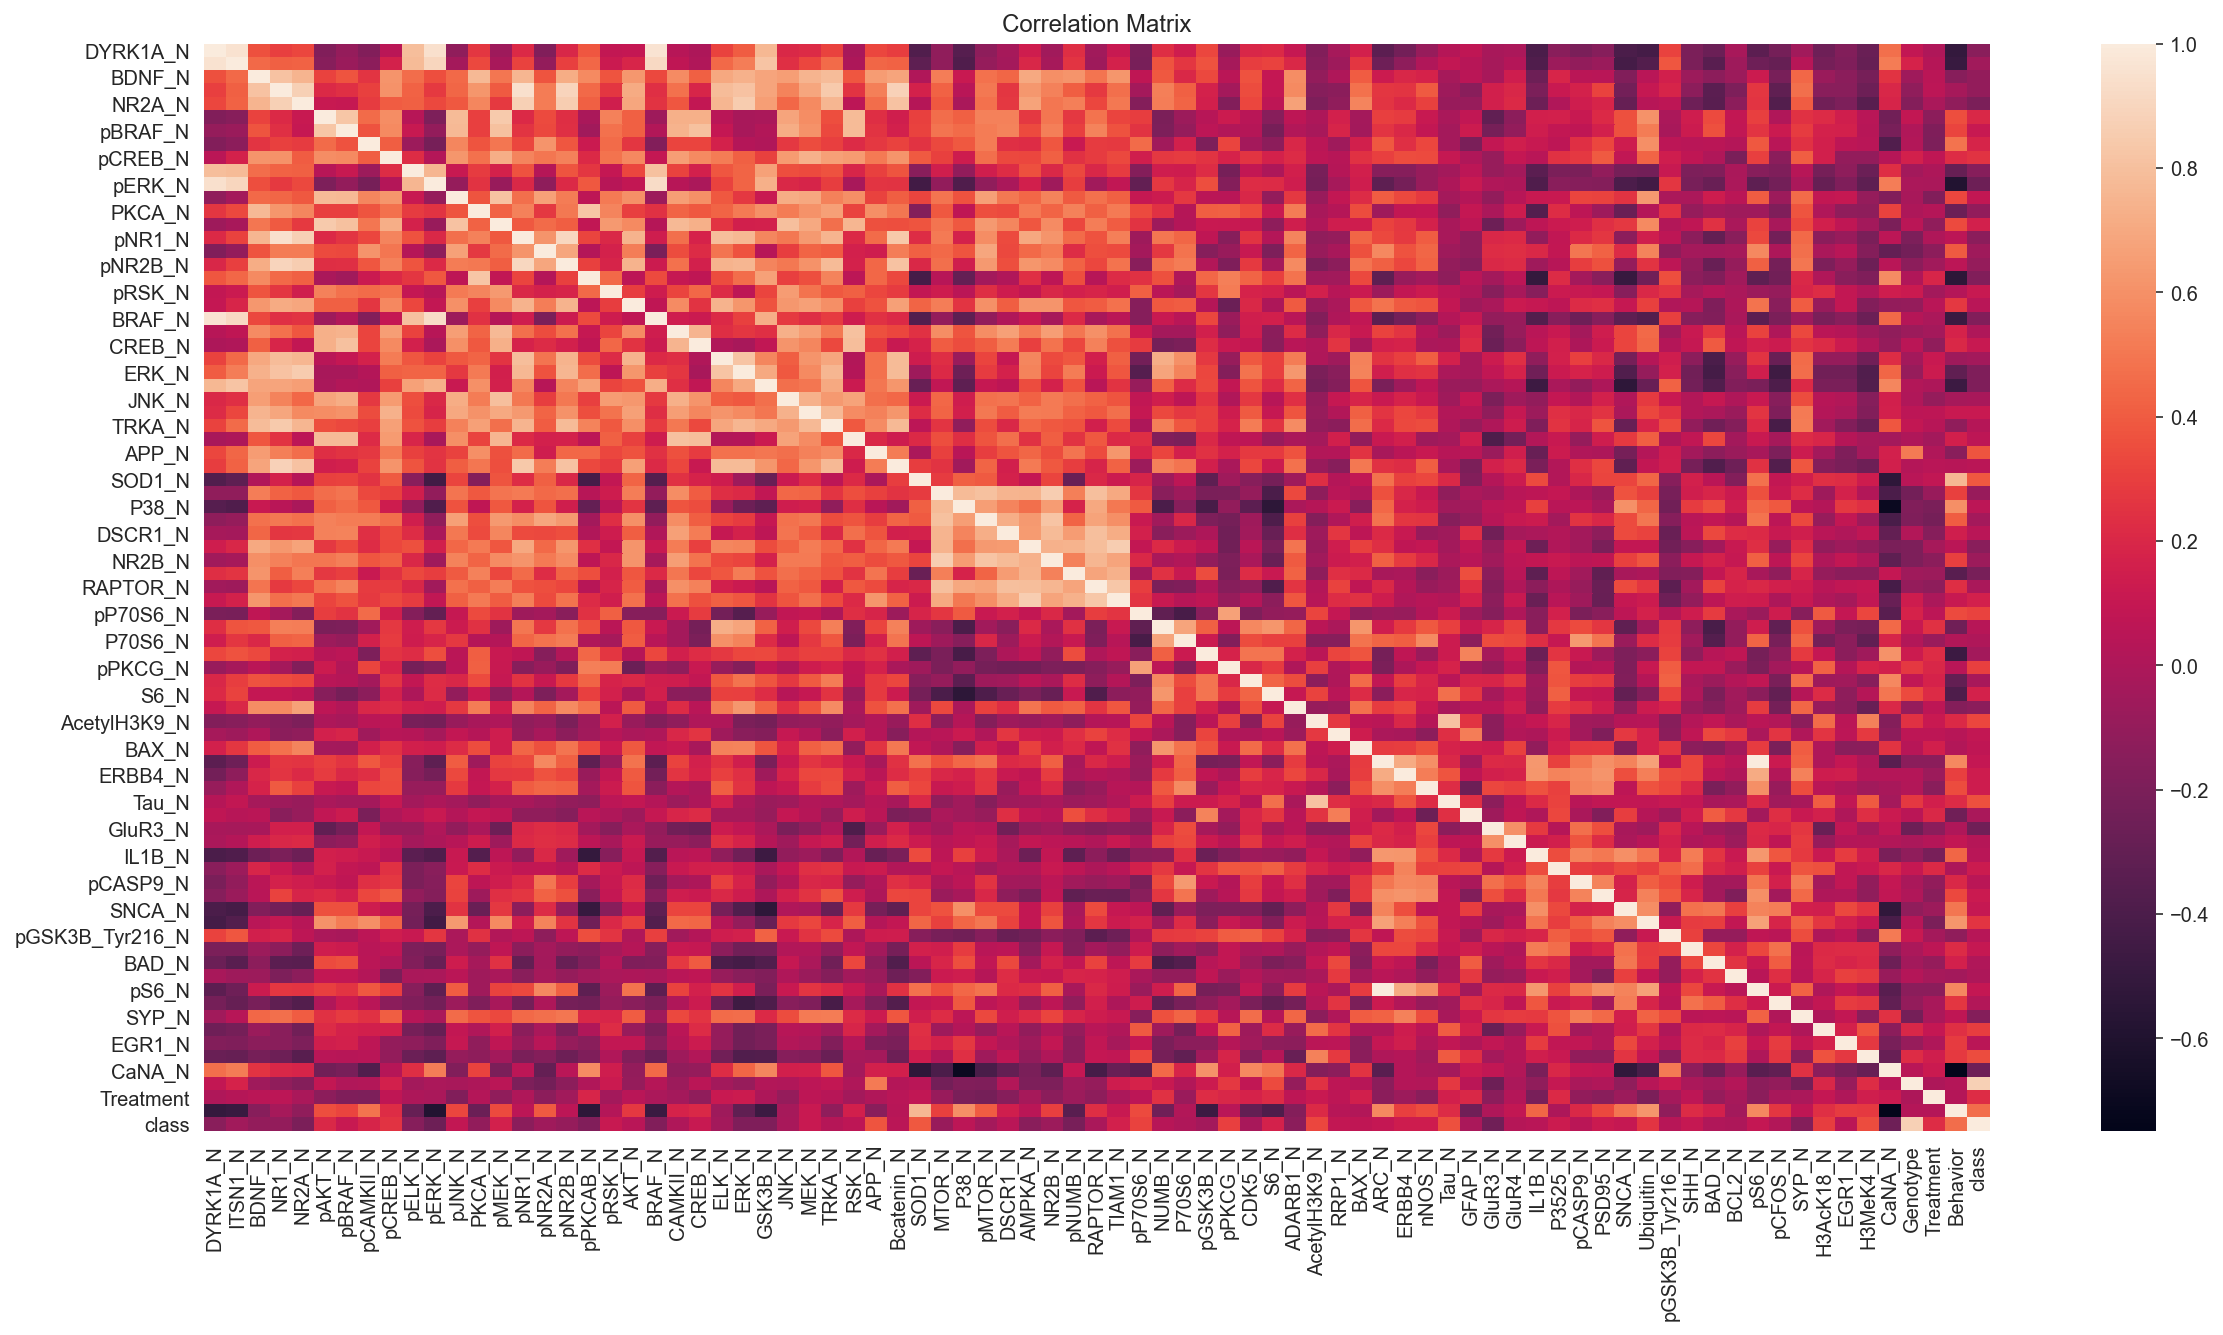

In [30]:
plt.figure(figsize = (20,10))
sns.heatmap(data_mice.corr())
plt.title('Correlation Matrix');

The target is correlated with many proteins' expression levels, showing that some of our features are significant in detecting the right group to which the mouse belongs. In what follows, we perform clustering and compare to the true labels $y$.


### 1.2) Mice Stratification using Unsupervised Learning
We will apply the clustering methods described in the first part in order to *discover* correct mice groups. Since no prior information is available, we will vary the number of clusters and see what information could be extracted through the evaluation metrics.  

Since all the evaluation metrics, except the silhouette coefficient, involve the true labels, we won't be using them, at least for discovering the optimal number of clusters. 

The two steps are the following: 
- First use the silhouette coefficient to assess the clustering
- Then, confirm/deny using the other available metrics 

In [31]:
# Number of clusters to test
nb_min = 1
nb_max = 20 + 1
nb_clusters = np.arange(nb_min,nb_max,1)

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

sil_km, sil_agg, sil_spec, sil_db = [], [], [], []
inertia_km = []
for k in nb_clusters:
    km1 = KMeans(n_clusters = k).fit(X)
    agg1 = AgglomerativeClustering(n_clusters = k).fit(X)
    spec1 = SpectralClustering(n_clusters = k, gamma = 2).fit(X)
    
    # Silhouette Scores & Inertia
    if k >= 2:
        sil_km.append(silhouette_score(X, km1.labels_ , metric = 'euclidean'))
        sil_agg.append(silhouette_score(X, agg1.labels_ , metric = 'euclidean'))
        sil_spec.append(silhouette_score(X, spec1.labels_ , metric = 'euclidean'))
    inertia_km.append(km1.inertia_)

We also attempt to fit a density-based clustering, known to be very efficient in stratification problems. This is done by Scikit-Learn `DBSCAN`, see https://scikit-learn.org/stable/modules/clustering.html#dbscan.

In [33]:
# Density-Based Clustering 
dbscan = DBSCAN(eps = 0.9, leaf_size = 30, min_samples = 15).fit(X)
dbscan.labels_+= 1
display(HTML(f"DBSCAN clusters {np.unique(dbscan.labels_)} <br/>"))

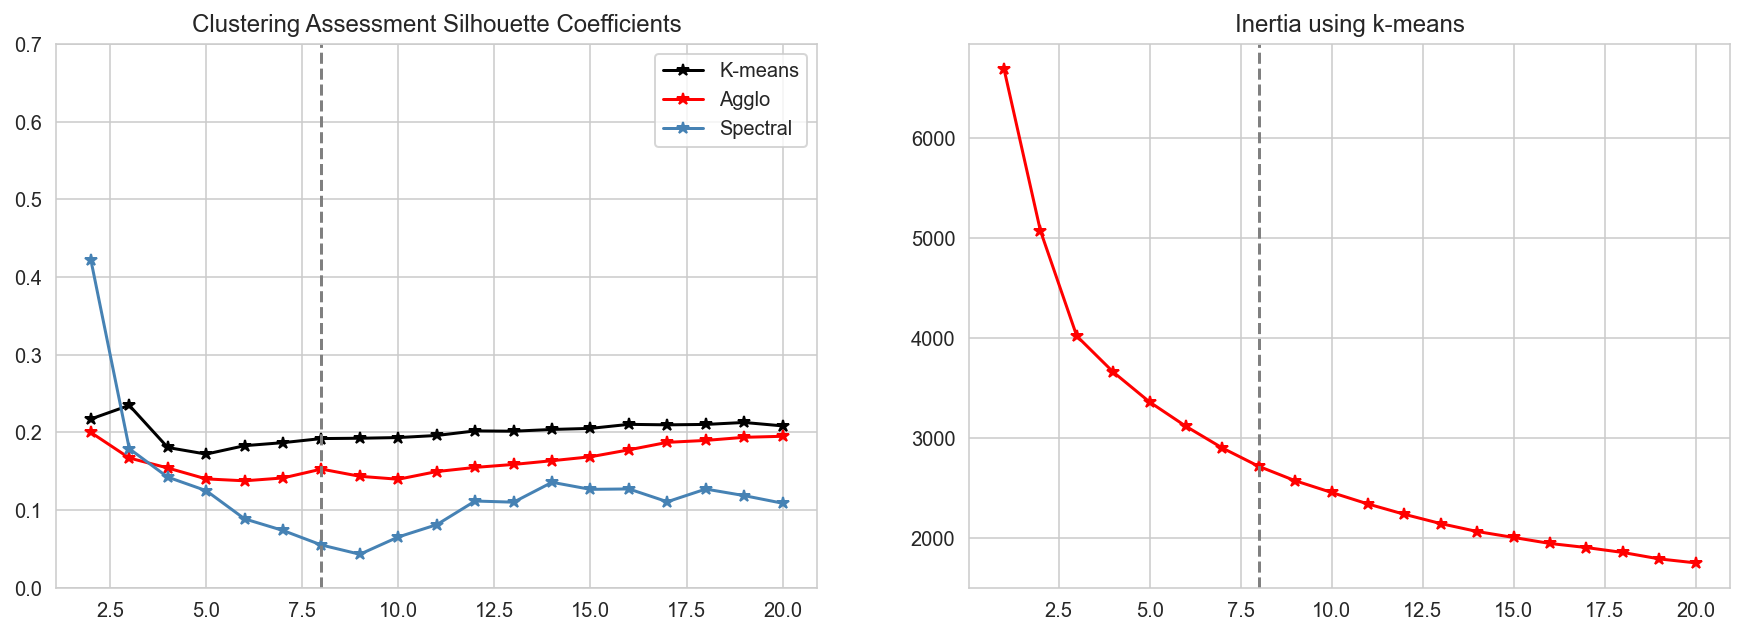

In [34]:
# Plots`
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(nb_clusters[1:], sil_km, '-*', label = 'K-means', color = 'black')
plt.plot(nb_clusters[1:], sil_agg, '-*', label = 'Agglo', color = 'red')
plt.plot(nb_clusters[1:], sil_spec, '-*', label = 'Spectral', color = 'steelblue')
plt.axvline(x = 8, ls = '--', color = 'gray')
plt.ylim(0,.7)
plt.legend(loc = 'best')
plt.title('Clustering Assessment Silhouette Coefficients');

plt.subplot(122)
plt.plot(nb_clusters, inertia_km, '-*', color = 'red')
plt.axvline(x = 8, ls = '--', color = 'gray')
plt.title('Inertia using k-means');

In [35]:
# Setting the number 
km1 = KMeans(n_clusters = 8).fit(X)
agg1 = AgglomerativeClustering(n_clusters = 8).fit(X)
spec1 = SpectralClustering(n_clusters = 8, gamma = 2).fit(X)

In [36]:
display(HTML(
    f"Correct k-means: {np.sum(km1.labels_ == y)} <br/>"
    f"Correct Agglomerative: {np.sum(agg1.labels_ == y)} <br/>"
    f"Correct Spectral: {np.sum(spec1.labels_ == y)} <br/>"
    f"Correct DBSCAN: {np.sum(dbscan.labels_ == y)} <br/>"
))

The left figure suggests the silhouette coefficient is very poor for all algorithms, which shows the difficulty of clustering into multiple groups. The right figure also suggests that the use of the elbow method could not achieve the desired stratification since no *'elbow'* is observed at $k=8$. 

In addition, the number of correctly stratified mice is also very low. All the algorithms don't perform well, including the newly introduced density-based clustering. This suggests the difficulty of exploring classification data without prior information on its labels. Furthermore, looking at the blue curve we could be interested to cluster the data into two subsets, as suggested by spectral clustering, which is totally wrong if we take into consideration the true labels.

However, we could use clustering outcome in order to detect some similarities between some groups of mice. In what follows, we further discuss this point. For this purpose, we set `nb_clusters = 2`, since all the algorithms have one of their highest `silhouette_score`. We will carry the analysis with the `KMeans` algorithm.

In [37]:
nb_clusters = 2
km1 = KMeans(n_clusters = nb_clusters).fit(X)

In [38]:
display(HTML(
  f"Cluster 1: {np.sum(km1.labels_ == 1)} instances = {100*np.sum(km1.labels_ == 1) / y.shape[0]} % <br/>"
  f"Cluster 2: {np.sum(km1.labels_ == 0)} instances = {100*np.sum(km1.labels_ == 0) / y.shape[0]} % <br/>\n"
)) 

In relationship with what was suggested by (Saringat and al., 2018), these clusters may correspond to the following:

- **Cluster 1:** normal genotype, treatment by memantine, shock-context behaviour.
- **Cluster 2:** syndrome down genotype, treatment by saline, no shock-context behaviour.

By doing so, clustering gives us hints about a possible first classification into two groups of mice.

As a conclusion, I would say clustering is much more efficient if a binary problem is considered, or at most 3 or 4 classes to detect. When the data has more labels, it is much more efficient to run classifiers in order to correctly predict the label. Back to a binary problem, it is interesting to explore the second data set which deals with Breast Cancer. As we will see, clustering methods will do better.


## 2) Breast Cancer 
This is a binary classification problem. The outcome (label) is the following diagnosis:
- B for benign
- M for malignant

Some of the features are described in this website https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). As we did for the Mice Protein Expression data, we will discard the labels and run clustering algorithms, with the hope of finding two disjoint groups corresponding to the right labels.  

### 2.1) Data exploration & Preprocessing
Similar approach will be applied to this data set. Since this table is simpler, containing neither missing values nor categorical features, we will move fast on the preprocessing phase. 



In [39]:
breast_cancer = pd.read_table('BreastDiagnostic.txt', sep = ',', header = None)

In [40]:
breast_cancer.head()

0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 32 columns]

In [41]:
display(HTML(
    f"Number of attributes: {breast_cancer.shape[1] - 2} <br/>"
    f"Number of patients: {breast_cancer.shape[0]} <br/>"))

In [42]:
breast_cancer.drop(columns = 0, inplace = True)
missing(breast_cancer) 

Empty DataFrame
Columns: [total, percentage]
Index: []

No missing values are contained in this table. However, the columns are unnamed and thus we don't have access to the meaning of each feature. We try to further explore the data set.

In [43]:
breast_cancer.describe()

2           3           4            5           6   \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

               7           8           9           10          11  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.104341    0.088799    0.048919    0.181162    0.062798  ...   
std      0.052813    0.079720    0.038803    0.027414    0.007060  ...   
min      0.019380    0.000000    0.000000    0.106000    0.049960  ...   
25%      0.064920    0.029560    0.020310    0.161900    0.057700  ...   
50%      0.092630    0.061540    0.033500    0.179200    0.061540  ...   
75%      0.130400    0.130700    0.074000    0.195700    0.066120  ...   
max      0.345400    0.426800    0.201200    0.304000    0.097440  ...   

               22          23          24           25          26  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    16.269190   25.677223  107.261213   880.583128    0.132369   
std      4.833242    6.146258   33.602542   569.356993    0.022832   
min      7.930000   12.020000   50.410000   185.200000    0.071170   
25%     13.010000   21.080000   84.110000   515.300000    0.116600   
50%     14.970000   25.410000   97.660000   686.500000    0.131300   
75%     18.790000   29.720000  125.400000  1084.000000    0.146000   
max     36.040000   49.540000  251.200000  4254.000000    0.222600   

               27          28          29          30          31  
count  569.000000  569.000000  569.000000  569.000000  569.000000  
mean     0.254265    0.272188    0.114606    0.290076    0.083946  
std      0.157336    0.208624    0.065732    0.061867    0.018061  
min      0.027290    0.000000    0.000000    0.156500    0.055040  
25%      0.147200    0.114500    0.064930    0.250400    0.071460  
50%      0.211900    0.226700    0.099930    0.282200    0.080040  
75%      0.339100    0.382900    0.161400    0.317900    0.092080  
max      1.058000    1.252000    0.291000    0.663800    0.207500  

[8 rows x 30 columns]

 - **Remark**: It is interesting to notice that some features have a much larger scale of values, we might need to resclae the data after the first clustering, if the results we got are poor. It is even pretty certain since we use algorithms that compute distances between data points. Let us move on with rescaling the data.

In [44]:
y = breast_cancer.loc[:,1]
X = breast_cancer.drop(columns = 1)

In [45]:
from sklearn.preprocessing import minmax_scale

X = pd.DataFrame(minmax_scale(X))

In [46]:
enc = OrdinalEncoder()
breast_cancer.loc[:,1] = enc.fit_transform(breast_cancer.loc[:,1].to_numpy().reshape(-1,1))

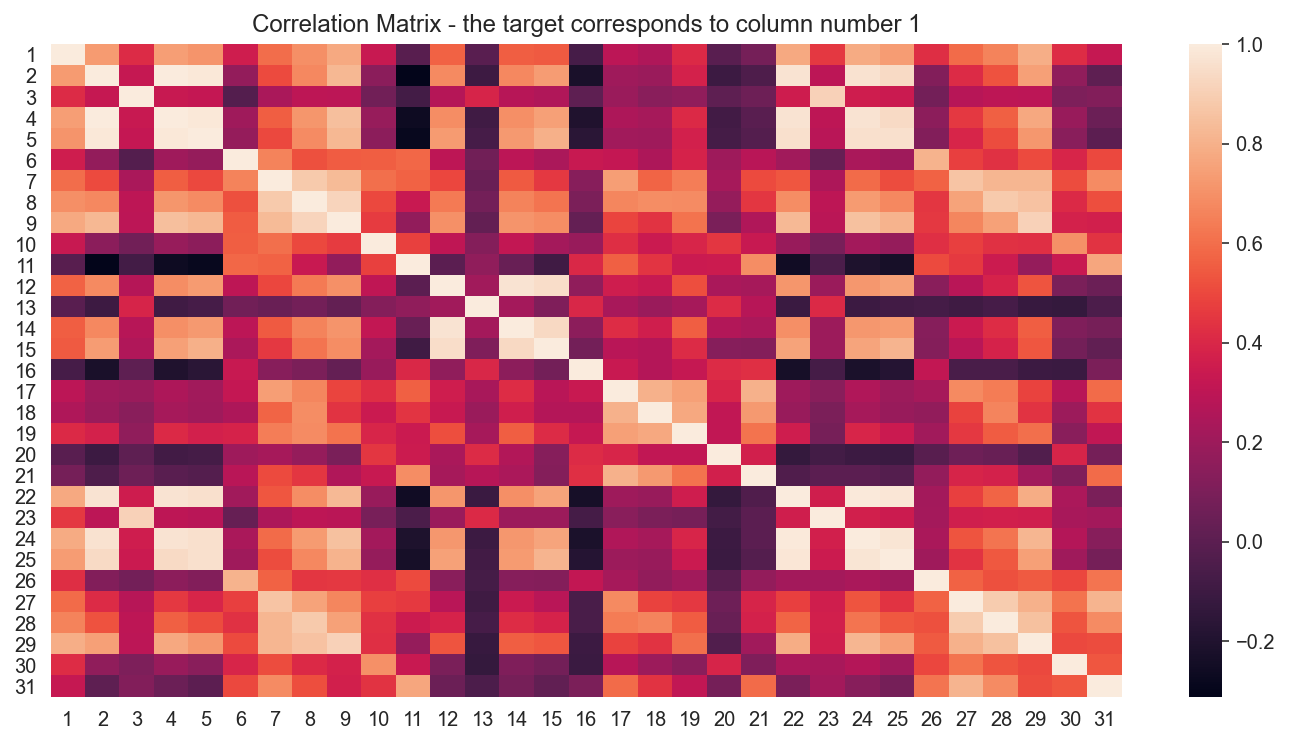

In [47]:
plt.figure(figsize = (12,6))
sns.heatmap(breast_cancer.corr())
plt.title('Correlation Matrix - the target corresponds to column number 1');

### 2.2) Breast Cancer diagnosis using Unsupervised Learning
Unlike the supervised approach, we suppose the the labels are unknown and try to figure out some similar groups. The same clustering algorithms as for the mice will be used.

In [48]:
# Number of clusters to test
nb_min = 1
nb_max = 10 + 1
nb_clusters = np.arange(nb_min,nb_max,1)

In [49]:
# Initializations
sil_km, sil_agg, sil_spec = [], [], []
hcv_km, hcv_agg, hcv_spec = [], [], [] 
ars_km, ars_agg, ars_spec = [], [], []
inertia_km = []

We run our clustering algorithms and see what useful information could be exploited. Similarly to the Mice analysis, we assess the stratification through the `silhouette_score`, conclude on the optimal number of clusters and then compare to the original labels through the other available metrics.

In [50]:
for k in nb_clusters:
    
    # Clusters fitting
    km2 = KMeans(n_clusters = k).fit(X)
    agg2 = AgglomerativeClustering(n_clusters = k).fit(X)
    spec2 = SpectralClustering(n_clusters = k, gamma = 3).fit(X)
    
    
    # Silhouette Scores & Inertia
    if k >=2:
        sil_km.append(silhouette_score(X, km2.labels_ , metric = 'euclidean'))
        sil_agg.append(silhouette_score(X, agg2.labels_ , metric = 'euclidean'))
        sil_spec.append(silhouette_score(X, spec2.labels_ , metric = 'euclidean'))
    inertia_km.append(km2.inertia_)
    
    
    # Other scores to assess clustering based on available labels
    hcv_km.append(metrics.homogeneity_completeness_v_measure(y, km2.labels_))
    ars_km.append(metrics.adjusted_rand_score(y, km2.labels_))
    
    hcv_agg.append(metrics.homogeneity_completeness_v_measure(y, agg2.labels_))
    ars_agg.append(metrics.adjusted_rand_score(y, agg2.labels_))
    
    hcv_spec.append(metrics.homogeneity_completeness_v_measure(y, spec2.labels_))
    ars_spec.append(metrics.adjusted_rand_score(y, spec2.labels_))

Here also, we run the `DBSCAN` algorithm.

In [51]:
# Density-based Clustering 
dbscan = DBSCAN(eps = 1.2, leaf_size = 3, min_samples = 2).fit(X)

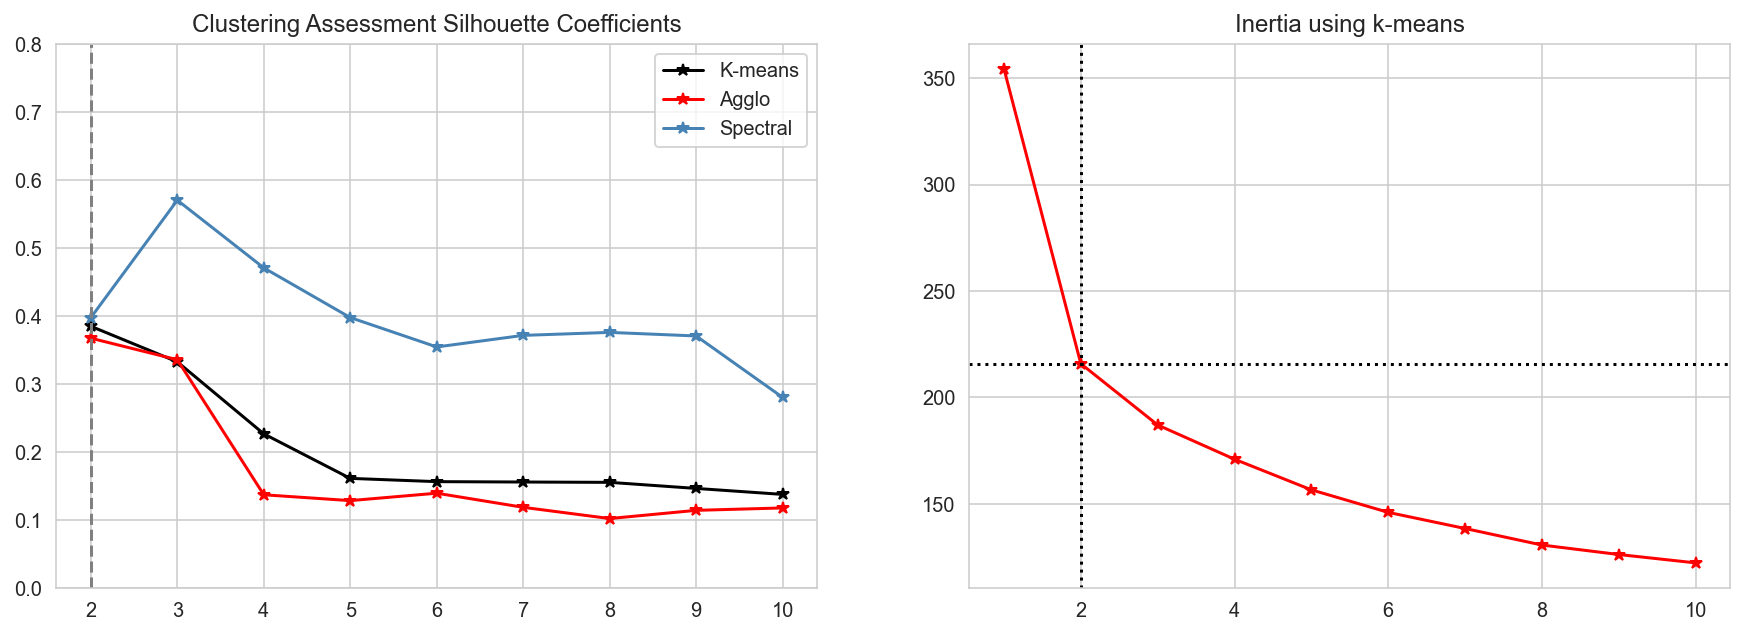

In [52]:
# Plots: Silhouette and Elbow method
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(nb_clusters[1:], sil_km,'-*', label = 'K-means', color = 'black')
plt.plot(nb_clusters[1:], sil_agg,'-*', label = 'Agglo', color = 'red')
plt.plot(nb_clusters[1:], sil_spec,'-*', label = 'Spectral', color = 'steelblue')
plt.axvline(x = 2, ls = '--', color = 'gray')
plt.ylim(0,0.8)
plt.legend(loc = 'best')
plt.title('Clustering Assessment Silhouette Coefficients');

plt.subplot(122)
plt.plot(nb_clusters, inertia_km, '-*', color = 'red')
plt.axvline(x = 2, ls = ':', color = 'black')
plt.axhline(y = inertia_km[1], ls = ':', color = 'black')
plt.title('Inertia using k-means');

In opposition to the analysis conducted on Mice Stratification, the right curve here exhibits an *elbow* at `nb_clusters = 2`, showing that some discriminative features lead to the existence of two separated groups. This is confirmed by exploring the curves on the left figure, which suggest that the highest `slihouette_score` is observed at `nb_clusters = 2` for 2 algorithms. 

Based on the figures above, and assuming no prior knowledge on the patients diagnosis for breast cancer, clustering helps making a step towards detecting whether the diagnosis would be M (cluster 1) or B (cluster 2).

In [53]:
km2 = KMeans(n_clusters = 2).fit(X)
agg2 = AgglomerativeClustering(n_clusters = 2).fit(X)
spec2 = SpectralClustering(n_clusters = 2, gamma = 3).fit(X)

Assume now we got acces to the true labels, plotting the graphs below will help evaluate our stratification and conclude on the best algorithm to use.

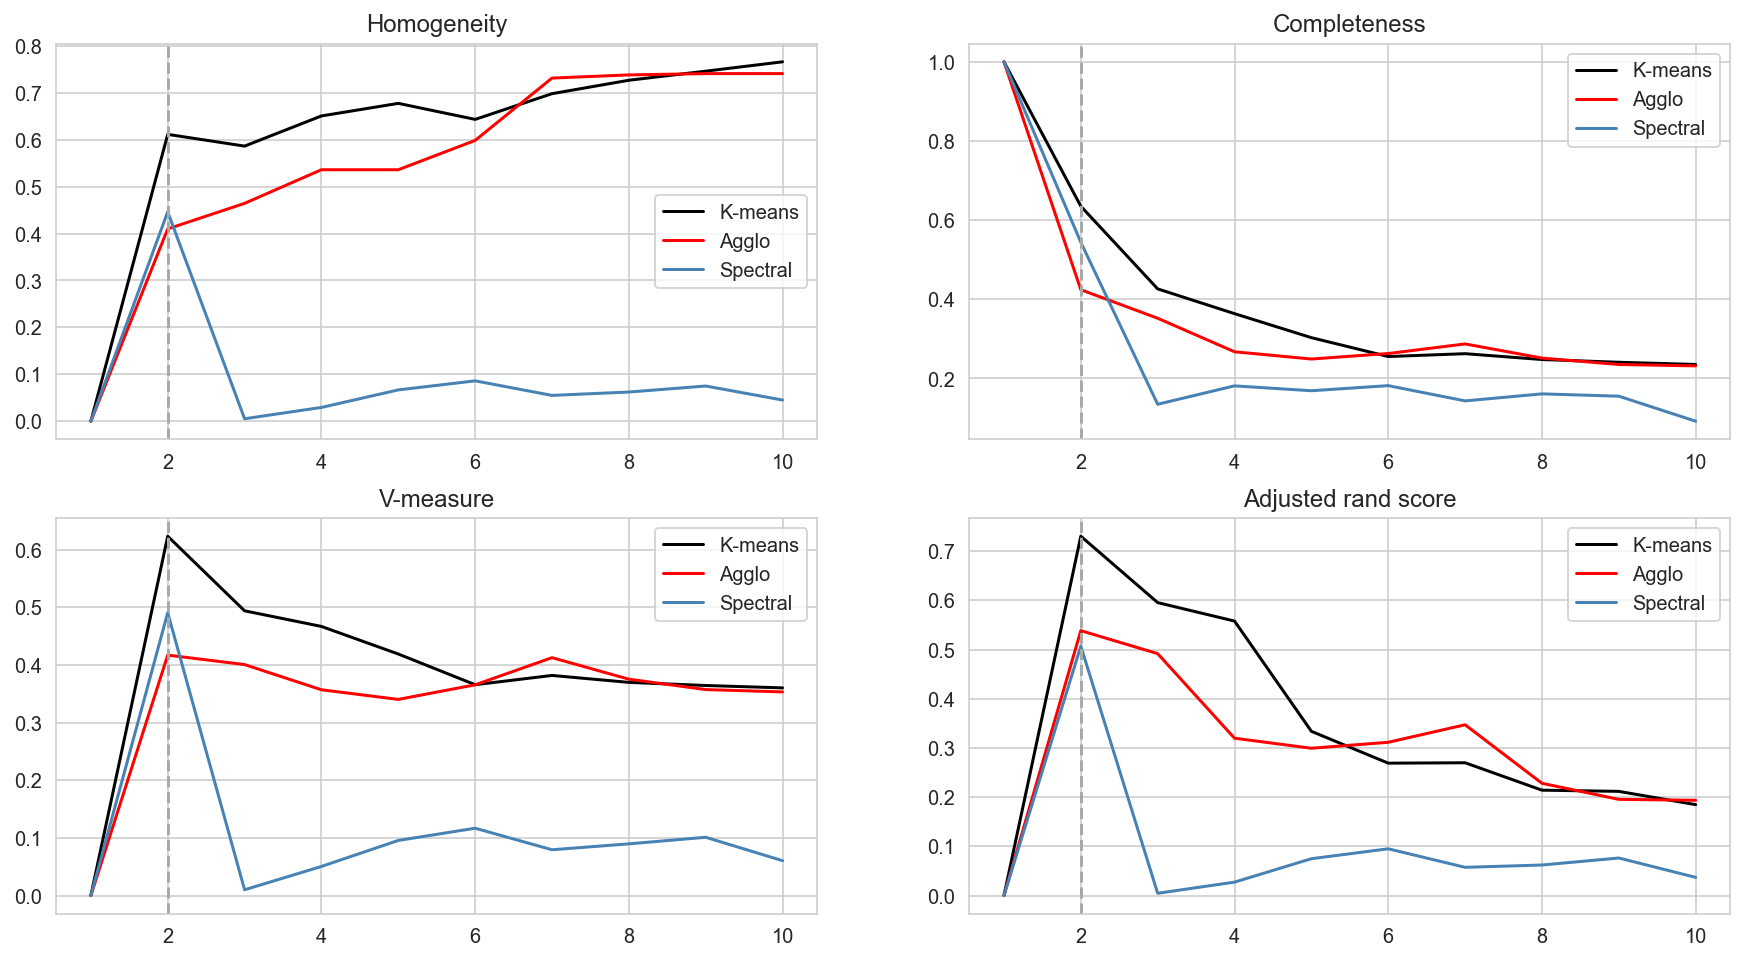

In [54]:
# Plots: Clustering assessment using available labels

plt.figure(figsize = (15,8))
for i,fig in zip(score,range(3)) :
    plt.subplot(2,2,fig+1)
    plt.plot(nb_clusters, np.array(hcv_km)[:,fig], label = 'K-means', color = 'black')
    plt.plot(nb_clusters, np.array(hcv_agg)[:,fig], label = 'Agglo', color = 'red')
    plt.plot(nb_clusters, np.array(hcv_spec)[:,fig], label = 'Spectral', color = 'steelblue')
    plt.axvline(x = 2, ls = '--', color = 'darkgray')
    plt.legend(loc = 'best')
    plt.title(i);

plt.subplot(2,2,4)
plt.plot(nb_clusters, ars_km, label = 'K-means', color = 'black')
plt.plot(nb_clusters, ars_agg, label = 'Agglo', color = 'red')
plt.plot(nb_clusters, ars_spec, label = 'Spectral', color = 'steelblue')
plt.axvline(x = 2, ls = '--', color = 'darkgray')
plt.legend(loc = 'best')
plt.title('Adjusted rand score');

First thing to notice, the maximum `v_measure_score` and `adj_rand_score` for all algorithms is achived at `nb_clusters = 2`, meaning the number of clusters selected using `silhouette_score` was right. 

None of the algorithms achives `v_measure_score = 1` or `adj_rand_score = 1`, the clusters still include some false positives, and some false negatives, but keep in mind the objective of clustering is to discover patterns and not to conclude on the diagnosis, the latter is the object of supervised Machine Learning, which we will illustrate the effectiveness in the last section.

If we compare to the Mice deta set, the performances we get here are higher since the nuature of the problem is easier, one could imagine that affecting patients into 2 groups is much easier than affecting into 8 groups. However, like we mentionned, the aim of Unsupervised approaches for both cases is to discover patterns in the data that may help through further analysis. If we want efficient discrimination, one should adapt a Supervised Approach. In our both cases, it is classification task that is required. 

## 3) Mice classification and Breast Cancer Diagnosis using Supervised Machine Learning

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [56]:
# Data for Mice
y_mice = data_mice['class']
X_mice = data_mice.drop(columns = ['class'])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_mice, y_mice, test_size = 0.3)

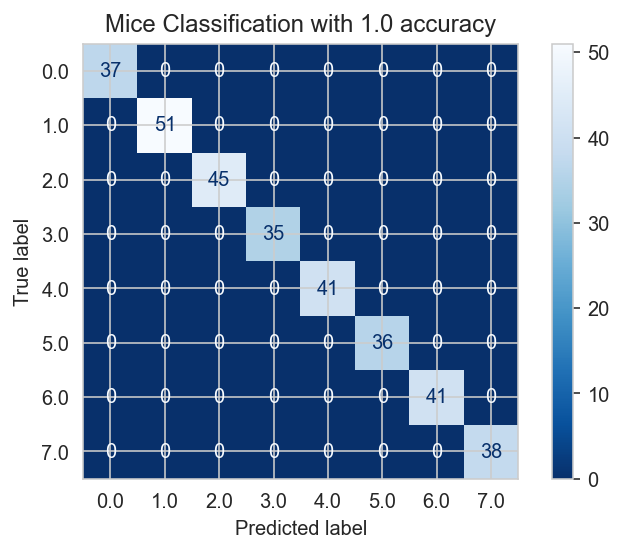

In [57]:
# Mice Classification
clf_mc = RandomForestClassifier(n_estimators = 200, max_depth = 6, criterion = 'entropy')
clf_mc.fit(X_train1,y_train1);

display(HTML(
    f"Classification score: {clf_mc.score(X_test1, y_test1)} <br/>"
))

plot_confusion_matrix(clf_mc, X_test1, y_test1, cmap = 'Blues_r')
plt.title('Mice Classification with {} accuracy'.format(clf_mc.score(X_test1, y_test1)));

In [58]:
# Data for Breast Cancer
X_train2, X_test2, y_train2,y_test2 = train_test_split(X, y, test_size = 0.2)

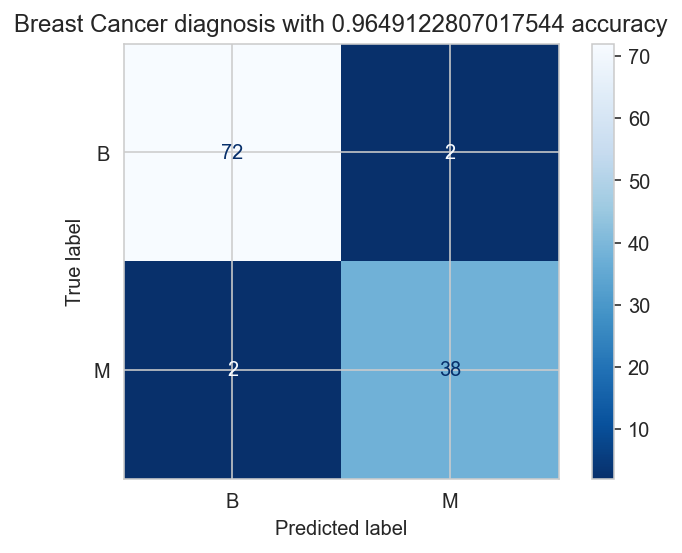

In [59]:
# Breast Cancer Diagnosis
clf_bc = RandomForestClassifier(n_estimators = 200, max_depth = 7, criterion = 'entropy')
clf_bc.fit(X_train2,y_train2);

display(HTML(
    f"Classification score: {clf_bc.score(X_test2, y_test2)} <br/>"
))

plot_confusion_matrix(clf_bc, X_test2, y_test2, cmap = 'Blues_r', )
plt.title('Breast Cancer diagnosis with {} accuracy'.format(clf_bc.score(X_test2, y_test2)));

As seen, supervised Machine Learning achieves very high accuracy for both datasets. The general approach to adopt in the future is to discovvery as much patterns as possible using Unsupervised ML, and then to carry with Supervised tasks and train highly accurate classifiers or regressors. 

# References
___

Mohd Zainuri Saringat , Aida Mustapha , Rachmadita Andeswari: *Comparative Analysis of Mice Protein Expression: Clustering
and Classification Approach*. Special Issue 2018: Data Information Engineering, Vol. 10 No. 6 (2018) p. 26-30.

Maxime Sangnier: *Introduction to Machine Learning*. Sorbonne University, Pierre & Marie Curie Campus. 4 Place Jussieu, Paris 5.